In [1]:
# load libraries
from huggingface_hub import hf_hub_download
from ultralytics import YOLO
from supervision import Detections
from PIL import Image

C:\Users\danie\anaconda3\envs\ds_master\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Sample usage

source = https://huggingface.co/arnabdhar/YOLOv8-Face-Detection

In [2]:
# download model
model_path = hf_hub_download(repo_id="arnabdhar/YOLOv8-Face-Detection", filename="model.pt")

# load model
model = YOLO(model_path)

# inference
image_path = "sample/2013-10-08_12-40-36_UTC.jpg" # face
#image_path = "sample/2022-11-30_16-58-45_UTC_6.jpg" # no face
image = Image.open(image_path)

# Perform inference
output = model(image, save_conf=True)
results = Detections.from_ultralytics(output[0])


0: 640x640 1 FACE, 189.9ms
Speed: 12.7ms preprocess, 189.9ms inference, 11.6ms postprocess per image at shape (1, 3, 640, 640)


In [8]:
# conteo de caras en vez de si es cara o no

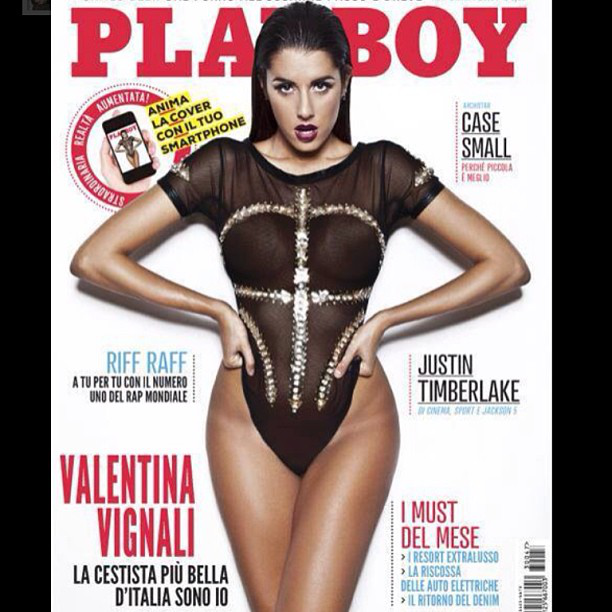

In [3]:
image

# Label all data

In [4]:
import os

def get_jpg_files(folder_path, users):
    jpg_files = []
    for user in users:
        user_folder = os.path.join(folder_path, user)
        if os.path.exists(user_folder):
            for root, dirs, files in os.walk(user_folder):
                for file in files:
                    if file.endswith('.jpg'):
                        jpg_files.append(os.path.join(root, file))
        else:
            print(f"Folder not found: {user_folder}")
    return jpg_files

# Example usage
users = ['hm', 'jacquemus', 'sheinofficial', 'chanelofficial']
folder_path = '../1_download_data/'
jpg_files = get_jpg_files(folder_path, users)
jpg_files[0:10]

['../1_download_data/data/raw/-PHbiexlr_\\2015-11-18_18-26-59_UTC.jpg',
 '../1_download_data/data/raw/3YO1o0Rlkt\\2015-06-01_07-45-08_UTC.jpg',
 '../1_download_data/data/raw/4yqgDyxloK\\2015-07-06_10-38-30_UTC.jpg',
 '../1_download_data/data/raw/B-y2Fo8qcN_\\2020-04-10_08-57-20_UTC.jpg',
 '../1_download_data/data/raw/B3__d73i46x\\2019-10-24_11-49-40_UTC.jpg',
 '../1_download_data/data/raw/B8zBgZeD8bQ\\2020-02-20_17-34-19_UTC.jpg',
 '../1_download_data/data/raw/B9UltWvIDjA\\2020-03-04_18-25-36_UTC.jpg',
 '../1_download_data/data/raw/B9XY-IjjDWt\\2020-03-05_20-32-01_UTC_1.jpg',
 '../1_download_data/data/raw/B9XY-IjjDWt\\2020-03-05_20-32-01_UTC_2.jpg',
 '../1_download_data/data/raw/BBIHpekRlhD\\2016-01-29_14-48-24_UTC.jpg']

In [5]:
from tqdm import tqdm
dict_face_detection = {}
for image_path in tqdm(jpg_files):
    try:
        image = Image.open(image_path)
        # Perform inference
        output = model(image)
        results = Detections.from_ultralytics(output[0])
        tensor = output[0].boxes.xyxy  # Replace with your tensor
        # Accessing the first element
        if tensor.numel() > 0:  # Check if the tensor is not empty
            dict_face_detection[image_path] = 1
        else:
            dict_face_detection[image_path] = 0
    except:
        pass

  0%|                                                                                          | 0/764 [00:00<?, ?it/s]


0: 640x640 2 FACEs, 121.4ms
Speed: 5.0ms preprocess, 121.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


  0%|                                                                                  | 1/764 [00:00<02:09,  5.89it/s]


0: 640x640 1 FACE, 120.2ms
Speed: 4.6ms preprocess, 120.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


  0%|▏                                                                                 | 2/764 [00:00<02:06,  6.05it/s]


0: 640x640 2 FACEs, 125.4ms
Speed: 4.5ms preprocess, 125.4ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


  0%|▎                                                                                 | 3/764 [00:00<02:04,  6.09it/s]


0: 640x512 (no detections), 134.8ms
Speed: 4.5ms preprocess, 134.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  1%|▍                                                                                 | 4/764 [00:00<02:25,  5.21it/s]


0: 448x640 1 FACE, 100.1ms
Speed: 0.0ms preprocess, 100.1ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)


  1%|▌                                                                                 | 5/764 [00:00<02:14,  5.64it/s]


0: 640x544 1 FACE, 108.8ms
Speed: 5.2ms preprocess, 108.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


  1%|▋                                                                                 | 6/764 [00:01<02:18,  5.47it/s]


0: 640x544 2 FACEs, 95.1ms
Speed: 8.1ms preprocess, 95.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


  1%|▊                                                                                 | 7/764 [00:01<02:20,  5.38it/s]


0: 640x512 (no detections), 99.4ms
Speed: 0.0ms preprocess, 99.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  1%|▊                                                                                 | 8/764 [00:01<02:21,  5.34it/s]


0: 640x512 (no detections), 97.6ms
Speed: 2.0ms preprocess, 97.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  1%|▉                                                                                 | 9/764 [00:01<02:10,  5.77it/s]


0: 640x640 1 FACE, 108.8ms
Speed: 4.0ms preprocess, 108.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


  1%|█                                                                                | 10/764 [00:01<02:06,  5.94it/s]


0: 640x512 2 FACEs, 76.5ms
Speed: 3.0ms preprocess, 76.5ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 512)


  1%|█▏                                                                               | 11/764 [00:01<02:00,  6.23it/s]


0: 640x512 3 FACEs, 81.7ms
Speed: 3.0ms preprocess, 81.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  2%|█▎                                                                               | 12/764 [00:02<01:53,  6.61it/s]


0: 640x640 1 FACE, 117.7ms
Speed: 5.5ms preprocess, 117.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  2%|█▍                                                                               | 13/764 [00:02<01:56,  6.47it/s]


0: 640x512 1 FACE, 96.3ms
Speed: 8.0ms preprocess, 96.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 512)


  2%|█▍                                                                               | 14/764 [00:02<02:01,  6.17it/s]


0: 640x640 1 FACE, 107.2ms
Speed: 6.5ms preprocess, 107.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  2%|█▌                                                                               | 15/764 [00:02<01:59,  6.27it/s]


0: 640x512 1 FACE, 99.4ms
Speed: 4.3ms preprocess, 99.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  2%|█▋                                                                               | 16/764 [00:02<02:03,  6.06it/s]


0: 640x512 1 FACE, 99.6ms
Speed: 1.1ms preprocess, 99.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  2%|█▊                                                                               | 17/764 [00:02<02:00,  6.18it/s]


0: 640x640 1 FACE, 111.0ms
Speed: 4.0ms preprocess, 111.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


  2%|█▉                                                                               | 18/764 [00:03<02:00,  6.17it/s]


0: 640x512 (no detections), 95.9ms
Speed: 4.5ms preprocess, 95.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  2%|██                                                                               | 19/764 [00:03<02:04,  5.97it/s]


0: 640x512 (no detections), 103.2ms
Speed: 3.0ms preprocess, 103.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 512)


  3%|██                                                                               | 20/764 [00:03<02:02,  6.10it/s]


0: 640x512 (no detections), 99.7ms
Speed: 2.6ms preprocess, 99.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


  3%|██▏                                                                              | 21/764 [00:03<02:03,  6.03it/s]


0: 640x512 1 FACE, 104.7ms
Speed: 4.0ms preprocess, 104.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


  3%|██▎                                                                              | 22/764 [00:03<02:04,  5.97it/s]


0: 640x512 (no detections), 107.4ms
Speed: 3.4ms preprocess, 107.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


  3%|██▍                                                                              | 23/764 [00:03<02:07,  5.79it/s]


0: 640x512 1 FACE, 109.2ms
Speed: 4.5ms preprocess, 109.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  3%|██▌                                                                              | 24/764 [00:04<02:11,  5.64it/s]


0: 640x512 2 FACEs, 105.4ms
Speed: 0.0ms preprocess, 105.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


  3%|██▋                                                                              | 25/764 [00:04<02:12,  5.60it/s]


0: 640x512 (no detections), 101.1ms
Speed: 3.0ms preprocess, 101.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


  3%|██▊                                                                              | 26/764 [00:04<02:05,  5.89it/s]


0: 640x512 1 FACE, 97.8ms
Speed: 5.0ms preprocess, 97.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


  4%|██▊                                                                              | 27/764 [00:04<02:11,  5.60it/s]


0: 640x512 1 FACE, 101.6ms
Speed: 0.0ms preprocess, 101.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  4%|██▉                                                                              | 28/764 [00:04<02:14,  5.48it/s]


0: 640x512 1 FACE, 92.0ms
Speed: 2.0ms preprocess, 92.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  4%|███                                                                              | 29/764 [00:04<02:10,  5.61it/s]


0: 640x512 1 FACE, 94.1ms
Speed: 11.3ms preprocess, 94.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


  4%|███▏                                                                             | 30/764 [00:05<02:13,  5.48it/s]


0: 640x544 1 FACE, 93.9ms
Speed: 3.5ms preprocess, 93.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 544)


  4%|███▎                                                                             | 31/764 [00:05<02:12,  5.53it/s]


0: 640x544 (no detections), 94.8ms
Speed: 5.0ms preprocess, 94.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


  4%|███▍                                                                             | 32/764 [00:05<02:08,  5.68it/s]


0: 640x544 1 FACE, 90.7ms
Speed: 3.7ms preprocess, 90.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


  4%|███▍                                                                             | 33/764 [00:05<02:09,  5.66it/s]


0: 640x640 1 FACE, 109.9ms
Speed: 9.9ms preprocess, 109.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


  4%|███▌                                                                             | 34/764 [00:05<02:06,  5.75it/s]


0: 640x640 1 FACE, 109.1ms
Speed: 5.0ms preprocess, 109.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


  5%|███▋                                                                             | 35/764 [00:06<02:05,  5.79it/s]


0: 640x640 1 FACE, 109.8ms
Speed: 9.0ms preprocess, 109.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  5%|███▊                                                                             | 36/764 [00:06<02:04,  5.86it/s]


0: 640x640 (no detections), 138.7ms
Speed: 6.3ms preprocess, 138.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


  5%|███▉                                                                             | 37/764 [00:06<02:13,  5.44it/s]


0: 640x512 1 FACE, 103.3ms
Speed: 4.5ms preprocess, 103.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 512)


  5%|████                                                                             | 38/764 [00:06<02:19,  5.21it/s]


0: 640x512 1 FACE, 93.5ms
Speed: 4.7ms preprocess, 93.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


  5%|████▏                                                                            | 39/764 [00:06<02:13,  5.42it/s]


0: 640x512 1 FACE, 102.3ms
Speed: 2.5ms preprocess, 102.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


  5%|████▏                                                                            | 40/764 [00:06<02:12,  5.45it/s]


0: 640x512 2 FACEs, 99.0ms
Speed: 3.0ms preprocess, 99.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


  5%|████▎                                                                            | 41/764 [00:07<02:08,  5.63it/s]


0: 640x512 3 FACEs, 87.3ms
Speed: 0.0ms preprocess, 87.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  5%|████▍                                                                            | 42/764 [00:07<02:05,  5.75it/s]


0: 640x512 1 FACE, 106.0ms
Speed: 3.0ms preprocess, 106.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


  6%|████▌                                                                            | 43/764 [00:07<02:05,  5.74it/s]


0: 640x512 1 FACE, 106.4ms
Speed: 0.0ms preprocess, 106.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


  6%|████▋                                                                            | 44/764 [00:07<02:06,  5.69it/s]


0: 640x512 3 FACEs, 104.3ms
Speed: 4.5ms preprocess, 104.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


  6%|████▊                                                                            | 45/764 [00:07<02:08,  5.58it/s]


0: 640x512 5 FACEs, 94.0ms
Speed: 4.5ms preprocess, 94.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


  6%|████▉                                                                            | 46/764 [00:08<02:09,  5.56it/s]


0: 640x512 1 FACE, 92.9ms
Speed: 5.0ms preprocess, 92.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  6%|████▉                                                                            | 47/764 [00:08<02:03,  5.81it/s]


0: 640x512 1 FACE, 96.5ms
Speed: 2.5ms preprocess, 96.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)


  6%|█████                                                                            | 48/764 [00:08<02:04,  5.77it/s]


0: 640x512 7 FACEs, 95.5ms
Speed: 2.5ms preprocess, 95.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 512)


  6%|█████▏                                                                           | 49/764 [00:08<02:03,  5.79it/s]


0: 640x512 8 FACEs, 93.1ms
Speed: 3.1ms preprocess, 93.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


  7%|█████▎                                                                           | 50/764 [00:08<02:01,  5.90it/s]


0: 640x640 1 FACE, 108.8ms
Speed: 7.5ms preprocess, 108.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  7%|█████▍                                                                           | 51/764 [00:08<01:59,  5.98it/s]


0: 640x640 1 FACE, 104.8ms
Speed: 7.5ms preprocess, 104.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  7%|█████▌                                                                           | 52/764 [00:08<01:58,  6.01it/s]


0: 640x640 1 FACE, 108.3ms
Speed: 5.0ms preprocess, 108.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  7%|█████▌                                                                           | 53/764 [00:09<01:56,  6.09it/s]


0: 640x640 1 FACE, 122.2ms
Speed: 5.1ms preprocess, 122.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  7%|█████▋                                                                           | 54/764 [00:09<02:00,  5.88it/s]


0: 640x640 1 FACE, 118.8ms
Speed: 7.5ms preprocess, 118.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


  7%|█████▊                                                                           | 55/764 [00:09<02:01,  5.86it/s]


0: 640x640 1 FACE, 114.9ms
Speed: 4.6ms preprocess, 114.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


  7%|█████▉                                                                           | 56/764 [00:09<01:58,  5.98it/s]


0: 640x640 1 FACE, 105.0ms
Speed: 4.2ms preprocess, 105.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


  7%|██████                                                                           | 57/764 [00:09<01:57,  6.01it/s]


0: 640x640 1 FACE, 126.5ms
Speed: 4.5ms preprocess, 126.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  8%|██████▏                                                                          | 58/764 [00:10<02:00,  5.85it/s]


0: 640x640 1 FACE, 113.3ms
Speed: 5.0ms preprocess, 113.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


  8%|██████▎                                                                          | 59/764 [00:10<01:59,  5.91it/s]


0: 640x512 1 FACE, 107.6ms
Speed: 5.1ms preprocess, 107.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


  8%|██████▎                                                                          | 60/764 [00:10<02:04,  5.67it/s]


0: 640x512 1 FACE, 107.3ms
Speed: 0.0ms preprocess, 107.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


  8%|██████▍                                                                          | 61/764 [00:10<01:55,  6.06it/s]


0: 640x512 (no detections), 107.0ms
Speed: 5.0ms preprocess, 107.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  8%|██████▌                                                                          | 62/764 [00:10<01:48,  6.44it/s]


0: 640x512 (no detections), 94.9ms
Speed: 0.0ms preprocess, 94.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  8%|██████▋                                                                          | 63/764 [00:10<01:53,  6.15it/s]


0: 640x512 1 FACE, 97.4ms
Speed: 0.0ms preprocess, 97.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


  8%|██████▊                                                                          | 64/764 [00:11<02:13,  5.23it/s]


0: 640x512 1 FACE, 90.3ms
Speed: 3.0ms preprocess, 90.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


  9%|██████▉                                                                          | 65/764 [00:11<02:07,  5.47it/s]


0: 640x512 (no detections), 92.8ms
Speed: 3.0ms preprocess, 92.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


  9%|██████▉                                                                          | 66/764 [00:11<02:01,  5.73it/s]


0: 640x512 (no detections), 88.6ms
Speed: 3.1ms preprocess, 88.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 512)


  9%|███████                                                                          | 67/764 [00:11<01:56,  6.01it/s]


0: 640x512 (no detections), 95.9ms
Speed: 5.5ms preprocess, 95.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  9%|███████▏                                                                         | 68/764 [00:11<01:57,  5.95it/s]


0: 640x512 (no detections), 83.7ms
Speed: 4.5ms preprocess, 83.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  9%|███████▎                                                                         | 69/764 [00:11<01:56,  5.95it/s]


0: 640x512 (no detections), 93.2ms
Speed: 2.5ms preprocess, 93.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  9%|███████▍                                                                         | 70/764 [00:12<01:52,  6.15it/s]


0: 640x512 (no detections), 97.6ms
Speed: 0.0ms preprocess, 97.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


  9%|███████▌                                                                         | 71/764 [00:12<01:54,  6.07it/s]


0: 640x512 1 FACE, 98.8ms
Speed: 3.0ms preprocess, 98.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


  9%|███████▋                                                                         | 72/764 [00:12<01:54,  6.02it/s]


0: 640x512 1 FACE, 100.7ms
Speed: 4.2ms preprocess, 100.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 10%|███████▋                                                                         | 73/764 [00:12<01:59,  5.79it/s]


0: 640x512 1 FACE, 104.1ms
Speed: 0.0ms preprocess, 104.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 10%|███████▊                                                                         | 74/764 [00:12<02:02,  5.64it/s]


0: 640x512 1 FACE, 97.2ms
Speed: 0.0ms preprocess, 97.2ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 512)


 10%|███████▉                                                                         | 75/764 [00:12<02:01,  5.65it/s]


0: 640x512 1 FACE, 106.3ms
Speed: 3.0ms preprocess, 106.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 10%|████████                                                                         | 76/764 [00:13<02:02,  5.64it/s]


0: 640x512 1 FACE, 100.2ms
Speed: 2.7ms preprocess, 100.2ms inference, 9.7ms postprocess per image at shape (1, 3, 640, 512)


 10%|████████▏                                                                        | 77/764 [00:13<02:02,  5.59it/s]


0: 640x512 1 FACE, 96.4ms
Speed: 4.0ms preprocess, 96.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 10%|████████▎                                                                        | 78/764 [00:13<02:02,  5.59it/s]


0: 640x512 1 FACE, 107.3ms
Speed: 2.0ms preprocess, 107.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 10%|████████▍                                                                        | 79/764 [00:13<02:03,  5.53it/s]


0: 640x512 1 FACE, 97.1ms
Speed: 4.0ms preprocess, 97.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 10%|████████▍                                                                        | 80/764 [00:13<02:05,  5.45it/s]


0: 640x512 1 FACE, 93.9ms
Speed: 4.5ms preprocess, 93.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 11%|████████▌                                                                        | 81/764 [00:14<02:06,  5.38it/s]


0: 640x512 1 FACE, 92.3ms
Speed: 0.0ms preprocess, 92.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 11%|████████▋                                                                        | 82/764 [00:14<01:59,  5.70it/s]


0: 640x544 1 FACE, 93.1ms
Speed: 3.0ms preprocess, 93.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 11%|████████▊                                                                        | 83/764 [00:14<01:56,  5.82it/s]


0: 640x512 1 FACE, 90.1ms
Speed: 9.5ms preprocess, 90.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 11%|████████▉                                                                        | 84/764 [00:14<01:53,  6.00it/s]


0: 640x512 1 FACE, 95.3ms
Speed: 6.5ms preprocess, 95.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 11%|█████████                                                                        | 85/764 [00:14<01:57,  5.76it/s]


0: 640x512 1 FACE, 94.1ms
Speed: 4.0ms preprocess, 94.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


 11%|█████████                                                                        | 86/764 [00:14<01:56,  5.81it/s]


0: 640x512 1 FACE, 91.0ms
Speed: 2.8ms preprocess, 91.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 11%|█████████▏                                                                       | 87/764 [00:15<01:56,  5.82it/s]


0: 640x544 2 FACEs, 105.2ms
Speed: 5.5ms preprocess, 105.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 12%|█████████▎                                                                       | 88/764 [00:15<02:02,  5.51it/s]


0: 640x544 1 FACE, 114.4ms
Speed: 5.5ms preprocess, 114.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 12%|█████████▍                                                                       | 89/764 [00:15<02:07,  5.29it/s]


0: 640x544 1 FACE, 124.0ms
Speed: 0.0ms preprocess, 124.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 544)


 12%|█████████▌                                                                       | 90/764 [00:15<02:11,  5.12it/s]


0: 640x544 1 FACE, 104.1ms
Speed: 3.9ms preprocess, 104.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 544)


 12%|█████████▋                                                                       | 91/764 [00:15<02:09,  5.22it/s]


0: 640x544 1 FACE, 103.2ms
Speed: 5.7ms preprocess, 103.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 12%|█████████▊                                                                       | 92/764 [00:16<02:08,  5.22it/s]


0: 640x544 1 FACE, 107.0ms
Speed: 3.5ms preprocess, 107.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 544)


 12%|█████████▊                                                                       | 93/764 [00:16<02:08,  5.24it/s]


0: 640x544 1 FACE, 100.0ms
Speed: 4.5ms preprocess, 100.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 544)


 12%|█████████▉                                                                       | 94/764 [00:16<02:07,  5.24it/s]


0: 640x544 (no detections), 110.0ms
Speed: 3.7ms preprocess, 110.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 544)


 12%|██████████                                                                       | 95/764 [00:16<02:08,  5.20it/s]


0: 640x512 1 FACE, 98.9ms
Speed: 2.5ms preprocess, 98.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 13%|██████████▏                                                                      | 96/764 [00:16<02:03,  5.42it/s]


0: 640x512 1 FACE, 87.2ms
Speed: 3.5ms preprocess, 87.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 13%|██████████▎                                                                      | 97/764 [00:16<01:59,  5.59it/s]


0: 640x512 1 FACE, 96.4ms
Speed: 4.0ms preprocess, 96.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 13%|██████████▍                                                                      | 98/764 [00:17<01:55,  5.74it/s]


0: 640x512 2 FACEs, 92.1ms
Speed: 3.0ms preprocess, 92.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 13%|██████████▍                                                                      | 99/764 [00:17<01:51,  5.95it/s]


0: 640x640 1 FACE, 101.2ms
Speed: 6.5ms preprocess, 101.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 13%|██████████▍                                                                     | 100/764 [00:17<01:50,  6.01it/s]


0: 640x640 1 FACE, 106.5ms
Speed: 4.0ms preprocess, 106.5ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


 13%|██████████▌                                                                     | 101/764 [00:17<01:52,  5.89it/s]


0: 640x640 1 FACE, 100.0ms
Speed: 5.0ms preprocess, 100.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 13%|██████████▋                                                                     | 102/764 [00:17<01:49,  6.03it/s]


0: 640x640 1 FACE, 104.1ms
Speed: 4.5ms preprocess, 104.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 13%|██████████▊                                                                     | 103/764 [00:17<01:47,  6.13it/s]


0: 640x640 1 FACE, 108.9ms
Speed: 4.0ms preprocess, 108.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 14%|██████████▉                                                                     | 104/764 [00:18<01:46,  6.18it/s]


0: 640x512 5 FACEs, 96.2ms
Speed: 2.5ms preprocess, 96.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


 14%|██████████▉                                                                     | 105/764 [00:18<01:52,  5.86it/s]


0: 640x512 2 FACEs, 95.1ms
Speed: 5.0ms preprocess, 95.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 14%|███████████                                                                     | 106/764 [00:18<01:42,  6.41it/s]


0: 640x512 1 FACE, 110.2ms
Speed: 0.0ms preprocess, 110.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 14%|███████████▏                                                                    | 107/764 [00:18<01:39,  6.63it/s]


0: 640x512 1 FACE, 109.3ms
Speed: 0.0ms preprocess, 109.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 512)


 14%|███████████▎                                                                    | 108/764 [00:18<01:36,  6.79it/s]


0: 640x512 (no detections), 102.6ms
Speed: 3.0ms preprocess, 102.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 14%|███████████▍                                                                    | 109/764 [00:18<01:42,  6.40it/s]


0: 640x640 1 FACE, 122.8ms
Speed: 4.0ms preprocess, 122.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 14%|███████████▌                                                                    | 110/764 [00:19<01:47,  6.08it/s]


0: 640x640 (no detections), 126.9ms
Speed: 7.5ms preprocess, 126.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|███████████▌                                                                    | 111/764 [00:19<01:53,  5.73it/s]


0: 640x640 1 FACE, 110.7ms
Speed: 5.9ms preprocess, 110.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 15%|███████████▋                                                                    | 112/764 [00:19<01:53,  5.74it/s]


0: 640x640 1 FACE, 107.8ms
Speed: 4.5ms preprocess, 107.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|███████████▊                                                                    | 113/764 [00:19<01:52,  5.78it/s]


0: 640x640 (no detections), 104.6ms
Speed: 5.0ms preprocess, 104.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 15%|███████████▉                                                                    | 114/764 [00:19<01:49,  5.91it/s]


0: 640x640 (no detections), 102.0ms
Speed: 5.2ms preprocess, 102.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|████████████                                                                    | 115/764 [00:19<01:46,  6.12it/s]


0: 640x640 1 FACE, 106.6ms
Speed: 4.0ms preprocess, 106.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|████████████▏                                                                   | 116/764 [00:20<01:45,  6.17it/s]


0: 640x640 1 FACE, 106.9ms
Speed: 7.0ms preprocess, 106.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|████████████▎                                                                   | 117/764 [00:20<01:49,  5.92it/s]


0: 640x640 1 FACE, 106.6ms
Speed: 4.0ms preprocess, 106.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|████████████▎                                                                   | 118/764 [00:20<01:47,  6.03it/s]


0: 640x640 1 FACE, 116.7ms
Speed: 0.0ms preprocess, 116.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 16%|████████████▍                                                                   | 119/764 [00:20<01:51,  5.81it/s]


0: 640x640 2 FACEs, 107.1ms
Speed: 2.7ms preprocess, 107.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 16%|████████████▌                                                                   | 120/764 [00:20<01:55,  5.59it/s]


0: 640x640 1 FACE, 113.6ms
Speed: 6.0ms preprocess, 113.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 16%|████████████▋                                                                   | 121/764 [00:20<01:55,  5.55it/s]


0: 640x512 1 FACE, 115.8ms
Speed: 0.0ms preprocess, 115.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 16%|████████████▊                                                                   | 122/764 [00:21<01:57,  5.48it/s]


0: 640x512 1 FACE, 102.0ms
Speed: 0.0ms preprocess, 102.0ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 512)


 16%|████████████▉                                                                   | 123/764 [00:21<01:54,  5.60it/s]


0: 640x544 1 FACE, 113.0ms
Speed: 0.0ms preprocess, 113.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 16%|████████████▉                                                                   | 124/764 [00:21<01:58,  5.41it/s]


0: 640x512 1 FACE, 103.1ms
Speed: 3.0ms preprocess, 103.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 512)


 16%|█████████████                                                                   | 125/764 [00:21<01:59,  5.34it/s]


0: 640x512 1 FACE, 88.3ms
Speed: 7.0ms preprocess, 88.3ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 512)


 16%|█████████████▏                                                                  | 126/764 [00:21<02:01,  5.25it/s]


0: 640x512 1 FACE, 99.8ms
Speed: 2.5ms preprocess, 99.8ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 17%|█████████████▎                                                                  | 127/764 [00:22<01:59,  5.35it/s]


0: 640x512 (no detections), 107.2ms
Speed: 0.0ms preprocess, 107.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 17%|█████████████▍                                                                  | 128/764 [00:22<01:59,  5.33it/s]


0: 640x512 1 FACE, 102.1ms
Speed: 0.0ms preprocess, 102.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 17%|█████████████▌                                                                  | 129/764 [00:22<01:54,  5.54it/s]


0: 640x512 1 FACE, 100.7ms
Speed: 3.0ms preprocess, 100.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 17%|█████████████▌                                                                  | 130/764 [00:22<01:52,  5.64it/s]


0: 640x512 1 FACE, 103.7ms
Speed: 6.4ms preprocess, 103.7ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 17%|█████████████▋                                                                  | 131/764 [00:22<01:53,  5.59it/s]


0: 640x512 (no detections), 93.1ms
Speed: 4.1ms preprocess, 93.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 17%|█████████████▊                                                                  | 132/764 [00:22<01:53,  5.54it/s]


0: 640x512 1 FACE, 94.2ms
Speed: 3.5ms preprocess, 94.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 17%|█████████████▉                                                                  | 133/764 [00:23<01:50,  5.73it/s]


0: 640x512 2 FACEs, 85.2ms
Speed: 4.5ms preprocess, 85.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 18%|██████████████                                                                  | 134/764 [00:23<01:51,  5.67it/s]


0: 640x512 1 FACE, 96.3ms
Speed: 4.0ms preprocess, 96.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 18%|██████████████▏                                                                 | 135/764 [00:23<01:50,  5.68it/s]


0: 640x512 1 FACE, 100.6ms
Speed: 3.0ms preprocess, 100.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 18%|██████████████▏                                                                 | 136/764 [00:23<01:50,  5.70it/s]


0: 640x512 1 FACE, 110.2ms
Speed: 4.5ms preprocess, 110.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 18%|██████████████▎                                                                 | 137/764 [00:23<01:52,  5.56it/s]


0: 640x512 1 FACE, 112.3ms
Speed: 5.1ms preprocess, 112.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 18%|██████████████▍                                                                 | 138/764 [00:24<01:57,  5.34it/s]


0: 640x512 8 FACEs, 104.7ms
Speed: 10.3ms preprocess, 104.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 18%|██████████████▌                                                                 | 139/764 [00:24<01:56,  5.36it/s]


0: 640x512 1 FACE, 97.5ms
Speed: 2.0ms preprocess, 97.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 18%|██████████████▋                                                                 | 140/764 [00:24<01:52,  5.54it/s]


0: 640x512 1 FACE, 98.5ms
Speed: 0.0ms preprocess, 98.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


 18%|██████████████▊                                                                 | 141/764 [00:24<01:49,  5.69it/s]


0: 448x640 1 FACE, 95.7ms
Speed: 2.0ms preprocess, 95.7ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


 19%|██████████████▊                                                                 | 142/764 [00:24<01:44,  5.98it/s]


0: 640x640 1 FACE, 108.2ms
Speed: 7.1ms preprocess, 108.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 19%|██████████████▉                                                                 | 143/764 [00:24<01:47,  5.79it/s]


0: 640x512 1 FACE, 83.6ms
Speed: 3.1ms preprocess, 83.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 512)


 19%|███████████████                                                                 | 144/764 [00:25<01:44,  5.96it/s]


0: 640x512 2 FACEs, 103.4ms
Speed: 3.0ms preprocess, 103.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 19%|███████████████▏                                                                | 145/764 [00:25<01:47,  5.76it/s]


0: 640x512 1 FACE, 95.5ms
Speed: 3.5ms preprocess, 95.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 19%|███████████████▎                                                                | 146/764 [00:25<01:45,  5.85it/s]


0: 640x512 1 FACE, 92.0ms
Speed: 3.0ms preprocess, 92.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 19%|███████████████▍                                                                | 147/764 [00:25<01:44,  5.93it/s]


0: 640x512 (no detections), 84.0ms
Speed: 2.0ms preprocess, 84.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 19%|███████████████▍                                                                | 148/764 [00:25<01:43,  5.97it/s]


0: 640x512 2 FACEs, 94.9ms
Speed: 3.5ms preprocess, 94.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 20%|███████████████▌                                                                | 149/764 [00:25<01:42,  6.02it/s]


0: 640x512 1 FACE, 96.9ms
Speed: 0.0ms preprocess, 96.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 20%|███████████████▋                                                                | 150/764 [00:26<01:42,  5.96it/s]


0: 640x512 1 FACE, 92.5ms
Speed: 5.0ms preprocess, 92.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 20%|███████████████▊                                                                | 151/764 [00:26<01:43,  5.93it/s]


0: 640x512 1 FACE, 91.6ms
Speed: 3.4ms preprocess, 91.6ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 512)


 20%|███████████████▉                                                                | 152/764 [00:26<01:44,  5.86it/s]


0: 640x512 1 FACE, 100.3ms
Speed: 2.5ms preprocess, 100.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 20%|████████████████                                                                | 153/764 [00:26<01:45,  5.82it/s]


0: 640x512 2 FACEs, 97.9ms
Speed: 3.0ms preprocess, 97.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 20%|████████████████▏                                                               | 154/764 [00:26<01:46,  5.71it/s]


0: 640x512 1 FACE, 94.8ms
Speed: 10.0ms preprocess, 94.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 20%|████████████████▏                                                               | 155/764 [00:26<01:46,  5.74it/s]


0: 640x512 1 FACE, 110.0ms
Speed: 5.0ms preprocess, 110.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 20%|████████████████▎                                                               | 156/764 [00:27<01:48,  5.59it/s]


0: 640x512 1 FACE, 108.3ms
Speed: 0.0ms preprocess, 108.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 21%|████████████████▍                                                               | 157/764 [00:27<01:48,  5.59it/s]


0: 640x512 1 FACE, 109.6ms
Speed: 0.0ms preprocess, 109.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 512)


 21%|████████████████▌                                                               | 158/764 [00:27<01:49,  5.54it/s]


0: 640x512 1 FACE, 110.1ms
Speed: 10.1ms preprocess, 110.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 21%|████████████████▋                                                               | 159/764 [00:27<01:50,  5.48it/s]


0: 640x512 (no detections), 95.4ms
Speed: 3.9ms preprocess, 95.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 21%|████████████████▊                                                               | 160/764 [00:27<01:50,  5.45it/s]


0: 640x512 1 FACE, 100.3ms
Speed: 2.2ms preprocess, 100.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 21%|████████████████▊                                                               | 161/764 [00:28<01:50,  5.44it/s]


0: 512x640 2 FACEs, 125.0ms
Speed: 3.0ms preprocess, 125.0ms inference, 0.0ms postprocess per image at shape (1, 3, 512, 640)


 21%|████████████████▉                                                               | 162/764 [00:28<01:49,  5.48it/s]


0: 512x640 (no detections), 108.8ms
Speed: 4.2ms preprocess, 108.8ms inference, 0.0ms postprocess per image at shape (1, 3, 512, 640)


 21%|█████████████████                                                               | 163/764 [00:28<01:47,  5.59it/s]


0: 512x640 2 FACEs, 95.2ms
Speed: 4.0ms preprocess, 95.2ms inference, 0.0ms postprocess per image at shape (1, 3, 512, 640)


 21%|█████████████████▏                                                              | 164/764 [00:28<01:44,  5.72it/s]


0: 640x512 1 FACE, 99.1ms
Speed: 4.0ms preprocess, 99.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 22%|█████████████████▎                                                              | 165/764 [00:28<01:46,  5.60it/s]


0: 640x512 1 FACE, 95.1ms
Speed: 0.0ms preprocess, 95.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 22%|█████████████████▍                                                              | 166/764 [00:28<01:46,  5.61it/s]


0: 640x512 1 FACE, 104.1ms
Speed: 4.5ms preprocess, 104.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 22%|█████████████████▍                                                              | 167/764 [00:29<01:46,  5.60it/s]


0: 640x512 1 FACE, 98.8ms
Speed: 0.0ms preprocess, 98.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 22%|█████████████████▌                                                              | 168/764 [00:29<01:47,  5.55it/s]


0: 640x512 1 FACE, 101.3ms
Speed: 2.9ms preprocess, 101.3ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 512)


 22%|█████████████████▋                                                              | 169/764 [00:29<01:48,  5.49it/s]


0: 640x512 1 FACE, 98.8ms
Speed: 2.5ms preprocess, 98.8ms inference, 8.8ms postprocess per image at shape (1, 3, 640, 512)


 22%|█████████████████▊                                                              | 170/764 [00:29<01:47,  5.51it/s]


0: 640x512 1 FACE, 87.8ms
Speed: 2.6ms preprocess, 87.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 22%|█████████████████▉                                                              | 171/764 [00:29<01:44,  5.69it/s]


0: 640x512 1 FACE, 125.3ms
Speed: 1.5ms preprocess, 125.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 23%|██████████████████                                                              | 172/764 [00:30<01:51,  5.31it/s]


0: 640x512 1 FACE, 101.1ms
Speed: 5.0ms preprocess, 101.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 512)


 23%|██████████████████                                                              | 173/764 [00:30<01:51,  5.30it/s]


0: 640x512 1 FACE, 101.9ms
Speed: 3.5ms preprocess, 101.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 23%|██████████████████▏                                                             | 174/764 [00:30<01:51,  5.30it/s]


0: 640x512 1 FACE, 95.1ms
Speed: 7.5ms preprocess, 95.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 23%|██████████████████▎                                                             | 175/764 [00:30<01:49,  5.36it/s]


0: 640x512 1 FACE, 89.8ms
Speed: 5.0ms preprocess, 89.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 23%|██████████████████▍                                                             | 176/764 [00:30<01:47,  5.46it/s]


0: 640x512 1 FACE, 100.1ms
Speed: 7.9ms preprocess, 100.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


 23%|██████████████████▌                                                             | 177/764 [00:30<01:47,  5.45it/s]


0: 640x512 (no detections), 98.7ms
Speed: 3.0ms preprocess, 98.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 23%|██████████████████▋                                                             | 178/764 [00:31<01:48,  5.39it/s]


0: 640x512 1 FACE, 106.8ms
Speed: 0.0ms preprocess, 106.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 512)


 23%|██████████████████▋                                                             | 179/764 [00:31<01:49,  5.35it/s]


0: 640x512 2 FACEs, 92.4ms
Speed: 3.0ms preprocess, 92.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 24%|██████████████████▊                                                             | 180/764 [00:31<01:45,  5.54it/s]


0: 640x512 1 FACE, 95.7ms
Speed: 0.0ms preprocess, 95.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 24%|██████████████████▉                                                             | 181/764 [00:31<01:45,  5.50it/s]


0: 640x512 1 FACE, 114.2ms
Speed: 0.0ms preprocess, 114.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 24%|███████████████████                                                             | 182/764 [00:31<01:50,  5.27it/s]


0: 640x512 1 FACE, 99.0ms
Speed: 4.0ms preprocess, 99.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 24%|███████████████████▏                                                            | 183/764 [00:32<01:47,  5.39it/s]


0: 640x512 1 FACE, 100.0ms
Speed: 0.0ms preprocess, 100.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 24%|███████████████████▎                                                            | 184/764 [00:32<01:45,  5.52it/s]


0: 640x512 14 FACEs, 106.6ms
Speed: 0.0ms preprocess, 106.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 24%|███████████████████▎                                                            | 185/764 [00:32<01:43,  5.58it/s]


0: 640x544 1 FACE, 98.6ms
Speed: 10.3ms preprocess, 98.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 24%|███████████████████▍                                                            | 186/764 [00:32<01:33,  6.17it/s]


0: 640x512 1 FACE, 99.6ms
Speed: 5.5ms preprocess, 99.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 24%|███████████████████▌                                                            | 187/764 [00:32<01:37,  5.89it/s]


0: 640x544 1 FACE, 113.7ms
Speed: 6.0ms preprocess, 113.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 544)


 25%|███████████████████▋                                                            | 188/764 [00:32<01:39,  5.77it/s]


0: 640x512 1 FACE, 104.1ms
Speed: 5.0ms preprocess, 104.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 25%|███████████████████▊                                                            | 189/764 [00:33<01:41,  5.66it/s]


0: 640x512 1 FACE, 105.4ms
Speed: 4.0ms preprocess, 105.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 25%|███████████████████▉                                                            | 190/764 [00:33<01:48,  5.28it/s]


0: 640x512 1 FACE, 114.0ms
Speed: 6.5ms preprocess, 114.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 25%|████████████████████                                                            | 191/764 [00:33<01:51,  5.15it/s]


0: 640x512 1 FACE, 108.4ms
Speed: 8.0ms preprocess, 108.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


 25%|████████████████████                                                            | 192/764 [00:33<01:51,  5.15it/s]


0: 640x512 1 FACE, 98.3ms
Speed: 2.0ms preprocess, 98.3ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 512)


 25%|████████████████████▏                                                           | 193/764 [00:33<01:49,  5.22it/s]


0: 640x512 1 FACE, 102.3ms
Speed: 1.5ms preprocess, 102.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 25%|████████████████████▎                                                           | 194/764 [00:34<01:48,  5.23it/s]


0: 640x512 1 FACE, 104.5ms
Speed: 3.3ms preprocess, 104.5ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 512)


 26%|████████████████████▍                                                           | 195/764 [00:34<01:50,  5.13it/s]


0: 640x512 (no detections), 99.2ms
Speed: 3.0ms preprocess, 99.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 26%|████████████████████▌                                                           | 196/764 [00:34<01:46,  5.33it/s]


0: 640x512 (no detections), 112.0ms
Speed: 5.0ms preprocess, 112.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 26%|████████████████████▋                                                           | 197/764 [00:34<01:44,  5.41it/s]


0: 640x512 2 FACEs, 102.7ms
Speed: 2.0ms preprocess, 102.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 26%|████████████████████▋                                                           | 198/764 [00:34<01:44,  5.44it/s]


0: 640x512 2 FACEs, 108.3ms
Speed: 0.0ms preprocess, 108.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 26%|████████████████████▊                                                           | 199/764 [00:34<01:41,  5.57it/s]


0: 640x512 (no detections), 95.9ms
Speed: 3.0ms preprocess, 95.9ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 512)


 26%|████████████████████▉                                                           | 200/764 [00:35<01:40,  5.61it/s]


0: 640x512 1 FACE, 94.7ms
Speed: 4.0ms preprocess, 94.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 512)


 26%|█████████████████████                                                           | 201/764 [00:35<01:32,  6.09it/s]


0: 640x512 (no detections), 89.1ms
Speed: 2.0ms preprocess, 89.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 26%|█████████████████████▏                                                          | 202/764 [00:35<01:30,  6.20it/s]


0: 640x512 1 FACE, 95.1ms
Speed: 3.3ms preprocess, 95.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 512)


 27%|█████████████████████▎                                                          | 203/764 [00:35<01:32,  6.07it/s]


0: 640x512 2 FACEs, 92.2ms
Speed: 3.0ms preprocess, 92.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 27%|█████████████████████▎                                                          | 204/764 [00:35<01:32,  6.06it/s]


0: 640x544 1 FACE, 108.7ms
Speed: 6.1ms preprocess, 108.7ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 544)


 27%|█████████████████████▍                                                          | 205/764 [00:35<01:37,  5.76it/s]


0: 640x512 1 FACE, 107.9ms
Speed: 4.5ms preprocess, 107.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 27%|█████████████████████▌                                                          | 206/764 [00:36<01:37,  5.69it/s]


0: 640x512 1 FACE, 111.2ms
Speed: 2.5ms preprocess, 111.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 27%|█████████████████████▋                                                          | 207/764 [00:36<01:40,  5.54it/s]


0: 640x512 1 FACE, 103.5ms
Speed: 4.8ms preprocess, 103.5ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 27%|█████████████████████▊                                                          | 208/764 [00:36<01:40,  5.54it/s]


0: 640x512 1 FACE, 97.3ms
Speed: 5.0ms preprocess, 97.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 27%|█████████████████████▉                                                          | 209/764 [00:36<01:40,  5.53it/s]


0: 640x512 1 FACE, 104.8ms
Speed: 7.0ms preprocess, 104.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 27%|█████████████████████▉                                                          | 210/764 [00:36<01:39,  5.55it/s]


0: 640x512 1 FACE, 116.3ms
Speed: 5.0ms preprocess, 116.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 28%|██████████████████████                                                          | 211/764 [00:37<01:42,  5.37it/s]


0: 640x512 (no detections), 104.5ms
Speed: 4.5ms preprocess, 104.5ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 512)


 28%|██████████████████████▏                                                         | 212/764 [00:37<01:46,  5.17it/s]


0: 640x512 1 FACE, 89.7ms
Speed: 6.5ms preprocess, 89.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 28%|██████████████████████▎                                                         | 213/764 [00:37<01:45,  5.20it/s]


0: 640x512 1 FACE, 100.0ms
Speed: 4.0ms preprocess, 100.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 28%|██████████████████████▍                                                         | 214/764 [00:37<01:44,  5.27it/s]


0: 640x512 1 FACE, 97.6ms
Speed: 0.0ms preprocess, 97.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 28%|██████████████████████▌                                                         | 215/764 [00:37<01:39,  5.52it/s]


0: 640x512 1 FACE, 90.2ms
Speed: 7.5ms preprocess, 90.2ms inference, 9.8ms postprocess per image at shape (1, 3, 640, 512)


 28%|██████████████████████▌                                                         | 216/764 [00:38<01:39,  5.52it/s]


0: 640x512 1 FACE, 88.5ms
Speed: 3.1ms preprocess, 88.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 28%|██████████████████████▋                                                         | 217/764 [00:38<01:35,  5.74it/s]


0: 640x512 1 FACE, 88.2ms
Speed: 4.0ms preprocess, 88.2ms inference, 9.9ms postprocess per image at shape (1, 3, 640, 512)


 29%|██████████████████████▊                                                         | 218/764 [00:38<01:38,  5.57it/s]


0: 640x512 1 FACE, 90.0ms
Speed: 3.5ms preprocess, 90.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 29%|██████████████████████▉                                                         | 219/764 [00:38<01:33,  5.86it/s]


0: 640x512 1 FACE, 100.1ms
Speed: 4.5ms preprocess, 100.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 29%|███████████████████████                                                         | 220/764 [00:38<01:32,  5.91it/s]


0: 640x544 2 FACEs, 120.2ms
Speed: 5.0ms preprocess, 120.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 29%|███████████████████████▏                                                        | 221/764 [00:38<01:33,  5.81it/s]


0: 640x544 2 FACEs, 110.0ms
Speed: 4.0ms preprocess, 110.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 544)


 29%|███████████████████████▏                                                        | 222/764 [00:39<01:34,  5.74it/s]


0: 640x544 1 FACE, 102.2ms
Speed: 6.5ms preprocess, 102.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 544)


 29%|███████████████████████▎                                                        | 223/764 [00:39<01:37,  5.55it/s]


0: 640x512 1 FACE, 110.7ms
Speed: 4.2ms preprocess, 110.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 29%|███████████████████████▍                                                        | 224/764 [00:39<01:40,  5.39it/s]


0: 640x512 (no detections), 131.5ms
Speed: 4.0ms preprocess, 131.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 512)


 29%|███████████████████████▌                                                        | 225/764 [00:39<01:44,  5.15it/s]


0: 640x512 1 FACE, 102.0ms
Speed: 4.5ms preprocess, 102.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 30%|███████████████████████▋                                                        | 226/764 [00:39<01:46,  5.07it/s]


0: 640x512 (no detections), 96.1ms
Speed: 2.0ms preprocess, 96.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 30%|███████████████████████▊                                                        | 227/764 [00:40<01:42,  5.25it/s]


0: 640x512 1 FACE, 96.9ms
Speed: 3.0ms preprocess, 96.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 30%|███████████████████████▊                                                        | 228/764 [00:40<01:42,  5.24it/s]


0: 640x640 (no detections), 112.1ms
Speed: 4.4ms preprocess, 112.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 30%|███████████████████████▉                                                        | 229/764 [00:40<01:39,  5.35it/s]


0: 640x512 2 FACEs, 95.6ms
Speed: 3.0ms preprocess, 95.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 30%|████████████████████████                                                        | 230/764 [00:40<01:39,  5.39it/s]


0: 640x512 1 FACE, 88.3ms
Speed: 5.1ms preprocess, 88.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 30%|████████████████████████▏                                                       | 231/764 [00:40<01:33,  5.72it/s]


0: 640x512 1 FACE, 93.2ms
Speed: 3.0ms preprocess, 93.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 30%|████████████████████████▎                                                       | 232/764 [00:40<01:30,  5.85it/s]


0: 640x512 2 FACEs, 92.9ms
Speed: 0.0ms preprocess, 92.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 30%|████████████████████████▍                                                       | 233/764 [00:41<01:31,  5.79it/s]


0: 640x512 1 FACE, 94.0ms
Speed: 3.2ms preprocess, 94.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 31%|████████████████████████▌                                                       | 234/764 [00:41<01:30,  5.88it/s]


0: 640x512 1 FACE, 95.0ms
Speed: 4.0ms preprocess, 95.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 31%|████████████████████████▌                                                       | 235/764 [00:41<01:30,  5.82it/s]


0: 640x512 1 FACE, 94.2ms
Speed: 2.5ms preprocess, 94.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 31%|████████████████████████▋                                                       | 236/764 [00:41<01:30,  5.83it/s]


0: 640x544 1 FACE, 104.4ms
Speed: 4.0ms preprocess, 104.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 31%|████████████████████████▊                                                       | 237/764 [00:41<01:31,  5.77it/s]


0: 640x544 1 FACE, 115.4ms
Speed: 12.1ms preprocess, 115.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 31%|████████████████████████▉                                                       | 238/764 [00:41<01:33,  5.60it/s]


0: 640x512 1 FACE, 97.6ms
Speed: 4.0ms preprocess, 97.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 31%|█████████████████████████                                                       | 239/764 [00:42<01:34,  5.53it/s]


0: 640x512 1 FACE, 105.0ms
Speed: 0.0ms preprocess, 105.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 31%|█████████████████████████▏                                                      | 240/764 [00:42<01:34,  5.54it/s]


0: 640x544 (no detections), 109.7ms
Speed: 3.0ms preprocess, 109.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 32%|█████████████████████████▏                                                      | 241/764 [00:42<01:34,  5.55it/s]


0: 640x512 1 FACE, 149.9ms
Speed: 0.0ms preprocess, 149.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 32%|█████████████████████████▎                                                      | 242/764 [00:42<01:44,  5.01it/s]


0: 640x512 1 FACE, 100.0ms
Speed: 5.0ms preprocess, 100.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 32%|█████████████████████████▍                                                      | 243/764 [00:42<01:41,  5.12it/s]


0: 640x512 1 FACE, 103.1ms
Speed: 5.0ms preprocess, 103.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 32%|█████████████████████████▌                                                      | 244/764 [00:43<01:41,  5.13it/s]


0: 640x512 1 FACE, 92.2ms
Speed: 4.1ms preprocess, 92.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 32%|█████████████████████████▋                                                      | 245/764 [00:43<01:35,  5.43it/s]


0: 640x544 1 FACE, 103.5ms
Speed: 4.1ms preprocess, 103.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 544)


 32%|█████████████████████████▊                                                      | 246/764 [00:43<01:34,  5.46it/s]


0: 640x512 1 FACE, 110.0ms
Speed: 10.2ms preprocess, 110.0ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 512)


 32%|█████████████████████████▊                                                      | 247/764 [00:43<01:36,  5.36it/s]


0: 640x544 1 FACE, 100.2ms
Speed: 5.0ms preprocess, 100.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 32%|█████████████████████████▉                                                      | 248/764 [00:43<01:35,  5.40it/s]


0: 640x512 (no detections), 99.6ms
Speed: 0.0ms preprocess, 99.6ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 33%|██████████████████████████                                                      | 249/764 [00:44<01:36,  5.36it/s]


0: 640x512 1 FACE, 93.7ms
Speed: 0.0ms preprocess, 93.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 33%|██████████████████████████▏                                                     | 250/764 [00:44<01:34,  5.42it/s]


0: 640x512 1 FACE, 97.9ms
Speed: 2.0ms preprocess, 97.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 33%|██████████████████████████▎                                                     | 251/764 [00:44<01:34,  5.41it/s]


0: 640x640 1 FACE, 130.3ms
Speed: 6.0ms preprocess, 130.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|██████████████████████████▍                                                     | 252/764 [00:44<01:35,  5.37it/s]


0: 640x640 1 FACE, 126.0ms
Speed: 6.0ms preprocess, 126.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|██████████████████████████▍                                                     | 253/764 [00:44<01:34,  5.41it/s]


0: 640x640 1 FACE, 122.1ms
Speed: 0.0ms preprocess, 122.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|██████████████████████████▌                                                     | 254/764 [00:44<01:32,  5.53it/s]


0: 640x640 (no detections), 129.8ms
Speed: 2.6ms preprocess, 129.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|██████████████████████████▋                                                     | 255/764 [00:45<01:33,  5.47it/s]


0: 640x640 1 FACE, 110.1ms
Speed: 6.5ms preprocess, 110.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


 34%|██████████████████████████▊                                                     | 256/764 [00:45<01:30,  5.59it/s]


0: 640x640 1 FACE, 95.0ms
Speed: 5.1ms preprocess, 95.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 34%|██████████████████████████▉                                                     | 257/764 [00:45<01:26,  5.87it/s]


0: 640x640 1 FACE, 105.2ms
Speed: 5.0ms preprocess, 105.2ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


 34%|███████████████████████████                                                     | 258/764 [00:45<01:23,  6.04it/s]


0: 640x640 1 FACE, 126.2ms
Speed: 7.5ms preprocess, 126.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 34%|███████████████████████████                                                     | 259/764 [00:45<01:28,  5.71it/s]


0: 640x640 1 FACE, 107.3ms
Speed: 6.0ms preprocess, 107.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 34%|███████████████████████████▏                                                    | 260/764 [00:45<01:28,  5.68it/s]


0: 640x640 1 FACE, 127.2ms
Speed: 7.4ms preprocess, 127.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 34%|███████████████████████████▎                                                    | 261/764 [00:46<01:29,  5.64it/s]


0: 640x512 3 FACEs, 94.7ms
Speed: 5.0ms preprocess, 94.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 34%|███████████████████████████▍                                                    | 262/764 [00:46<01:24,  5.96it/s]


0: 640x544 2 FACEs, 83.8ms
Speed: 5.0ms preprocess, 83.8ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 544)


 34%|███████████████████████████▌                                                    | 263/764 [00:46<01:21,  6.17it/s]


0: 640x544 3 FACEs, 94.3ms
Speed: 2.1ms preprocess, 94.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 35%|███████████████████████████▋                                                    | 264/764 [00:46<01:20,  6.19it/s]


0: 640x512 1 FACE, 92.7ms
Speed: 5.1ms preprocess, 92.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 35%|███████████████████████████▋                                                    | 265/764 [00:46<01:28,  5.66it/s]


0: 640x512 1 FACE, 91.7ms
Speed: 2.0ms preprocess, 91.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 35%|███████████████████████████▊                                                    | 266/764 [00:47<01:31,  5.42it/s]


0: 640x512 2 FACEs, 95.0ms
Speed: 0.0ms preprocess, 95.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 35%|███████████████████████████▉                                                    | 267/764 [00:47<01:28,  5.60it/s]


0: 640x512 2 FACEs, 115.1ms
Speed: 0.0ms preprocess, 115.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 35%|████████████████████████████                                                    | 268/764 [00:47<01:28,  5.63it/s]


0: 640x512 1 FACE, 100.4ms
Speed: 5.0ms preprocess, 100.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 35%|████████████████████████████▏                                                   | 269/764 [00:47<01:27,  5.63it/s]


0: 640x512 1 FACE, 100.3ms
Speed: 0.0ms preprocess, 100.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 35%|████████████████████████████▎                                                   | 270/764 [00:47<01:24,  5.82it/s]


0: 384x640 7 FACEs, 92.8ms
Speed: 2.5ms preprocess, 92.8ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)


 35%|████████████████████████████▍                                                   | 271/764 [00:47<01:19,  6.18it/s]


0: 640x512 1 FACE, 99.9ms
Speed: 5.1ms preprocess, 99.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 36%|████████████████████████████▍                                                   | 272/764 [00:48<01:21,  6.02it/s]


0: 640x544 1 FACE, 99.9ms
Speed: 10.2ms preprocess, 99.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 544)


 36%|████████████████████████████▌                                                   | 273/764 [00:48<01:22,  5.92it/s]


0: 640x512 1 FACE, 96.4ms
Speed: 5.1ms preprocess, 96.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 36%|████████████████████████████▋                                                   | 274/764 [00:48<01:21,  6.02it/s]


0: 640x512 1 FACE, 104.0ms
Speed: 6.1ms preprocess, 104.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 36%|████████████████████████████▊                                                   | 275/764 [00:48<01:23,  5.84it/s]


0: 640x512 2 FACEs, 96.6ms
Speed: 0.0ms preprocess, 96.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 36%|████████████████████████████▉                                                   | 276/764 [00:48<01:25,  5.74it/s]


0: 640x512 (no detections), 96.0ms
Speed: 0.0ms preprocess, 96.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 36%|█████████████████████████████                                                   | 277/764 [00:48<01:24,  5.77it/s]


0: 640x512 1 FACE, 93.5ms
Speed: 0.0ms preprocess, 93.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 36%|█████████████████████████████                                                   | 278/764 [00:49<01:23,  5.83it/s]


0: 640x512 1 FACE, 90.1ms
Speed: 0.0ms preprocess, 90.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 37%|█████████████████████████████▏                                                  | 279/764 [00:49<01:21,  5.93it/s]


0: 640x512 1 FACE, 90.4ms
Speed: 5.0ms preprocess, 90.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 37%|█████████████████████████████▎                                                  | 280/764 [00:49<01:21,  5.96it/s]


0: 640x512 1 FACE, 89.9ms
Speed: 0.0ms preprocess, 89.9ms inference, 9.8ms postprocess per image at shape (1, 3, 640, 512)


 37%|█████████████████████████████▍                                                  | 281/764 [00:49<01:20,  6.00it/s]


0: 640x512 3 FACEs, 95.1ms
Speed: 4.0ms preprocess, 95.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


 37%|█████████████████████████████▌                                                  | 282/764 [00:49<01:22,  5.86it/s]


0: 640x512 1 FACE, 90.1ms
Speed: 0.0ms preprocess, 90.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 37%|█████████████████████████████▋                                                  | 283/764 [00:49<01:19,  6.02it/s]


0: 640x512 (no detections), 89.9ms
Speed: 0.0ms preprocess, 89.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 37%|█████████████████████████████▋                                                  | 284/764 [00:50<01:18,  6.09it/s]


0: 640x512 1 FACE, 107.3ms
Speed: 5.0ms preprocess, 107.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 37%|█████████████████████████████▊                                                  | 285/764 [00:50<01:21,  5.91it/s]


0: 640x512 1 FACE, 102.0ms
Speed: 2.5ms preprocess, 102.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 37%|█████████████████████████████▉                                                  | 286/764 [00:50<01:21,  5.89it/s]


0: 640x512 1 FACE, 97.6ms
Speed: 3.0ms preprocess, 97.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 38%|██████████████████████████████                                                  | 287/764 [00:50<01:23,  5.68it/s]


0: 640x512 1 FACE, 96.2ms
Speed: 6.0ms preprocess, 96.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 38%|██████████████████████████████▏                                                 | 288/764 [00:50<01:21,  5.84it/s]


0: 640x512 1 FACE, 94.7ms
Speed: 0.0ms preprocess, 94.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 38%|██████████████████████████████▎                                                 | 289/764 [00:50<01:21,  5.83it/s]


0: 640x512 1 FACE, 95.6ms
Speed: 3.0ms preprocess, 95.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 38%|██████████████████████████████▎                                                 | 290/764 [00:51<01:22,  5.76it/s]


0: 640x512 1 FACE, 99.8ms
Speed: 0.0ms preprocess, 99.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 38%|██████████████████████████████▍                                                 | 291/764 [00:51<01:22,  5.71it/s]


0: 640x512 (no detections), 110.0ms
Speed: 0.0ms preprocess, 110.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 38%|██████████████████████████████▌                                                 | 292/764 [00:51<01:24,  5.60it/s]


0: 640x512 1 FACE, 85.1ms
Speed: 3.0ms preprocess, 85.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 38%|██████████████████████████████▋                                                 | 293/764 [00:51<01:21,  5.76it/s]


0: 640x512 1 FACE, 100.3ms
Speed: 3.0ms preprocess, 100.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 38%|██████████████████████████████▊                                                 | 294/764 [00:51<01:22,  5.70it/s]


0: 640x512 1 FACE, 95.0ms
Speed: 5.0ms preprocess, 95.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 39%|██████████████████████████████▉                                                 | 295/764 [00:51<01:21,  5.75it/s]


0: 640x512 1 FACE, 94.9ms
Speed: 0.0ms preprocess, 94.9ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 39%|██████████████████████████████▉                                                 | 296/764 [00:52<01:19,  5.89it/s]


0: 640x512 1 FACE, 89.9ms
Speed: 6.5ms preprocess, 89.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 39%|███████████████████████████████                                                 | 297/764 [00:52<01:18,  5.96it/s]


0: 640x544 1 FACE, 100.2ms
Speed: 10.1ms preprocess, 100.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 39%|███████████████████████████████▏                                                | 298/764 [00:52<01:17,  6.03it/s]


0: 640x544 (no detections), 91.9ms
Speed: 10.2ms preprocess, 91.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 39%|███████████████████████████████▎                                                | 299/764 [00:52<01:18,  5.93it/s]


0: 640x544 1 FACE, 95.0ms
Speed: 5.0ms preprocess, 95.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 544)


 39%|███████████████████████████████▍                                                | 300/764 [00:52<01:20,  5.76it/s]


0: 640x544 1 FACE, 104.8ms
Speed: 5.0ms preprocess, 104.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 39%|███████████████████████████████▌                                                | 301/764 [00:52<01:21,  5.71it/s]


0: 640x544 1 FACE, 104.9ms
Speed: 0.0ms preprocess, 104.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 40%|███████████████████████████████▌                                                | 302/764 [00:53<01:21,  5.70it/s]


0: 640x544 1 FACE, 109.7ms
Speed: 5.0ms preprocess, 109.7ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 544)


 40%|███████████████████████████████▋                                                | 303/764 [00:53<01:20,  5.70it/s]


0: 640x544 1 FACE, 107.6ms
Speed: 2.1ms preprocess, 107.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 544)


 40%|███████████████████████████████▊                                                | 304/764 [00:53<01:22,  5.56it/s]


0: 640x544 1 FACE, 110.2ms
Speed: 5.0ms preprocess, 110.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 40%|███████████████████████████████▉                                                | 305/764 [00:53<01:22,  5.56it/s]


0: 640x544 1 FACE, 99.3ms
Speed: 0.0ms preprocess, 99.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


 40%|████████████████████████████████                                                | 306/764 [00:53<01:19,  5.75it/s]


0: 640x544 1 FACE, 101.5ms
Speed: 5.8ms preprocess, 101.5ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 544)


 40%|████████████████████████████████▏                                               | 307/764 [00:54<01:19,  5.74it/s]


0: 640x512 6 FACEs, 102.1ms
Speed: 0.0ms preprocess, 102.1ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 512)


 40%|████████████████████████████████▎                                               | 308/764 [00:54<01:22,  5.54it/s]


0: 640x640 1 FACE, 114.9ms
Speed: 4.0ms preprocess, 114.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 40%|████████████████████████████████▎                                               | 309/764 [00:54<01:21,  5.59it/s]


0: 640x640 1 FACE, 109.6ms
Speed: 3.6ms preprocess, 109.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 41%|████████████████████████████████▍                                               | 310/764 [00:54<01:19,  5.69it/s]


0: 640x640 1 FACE, 102.0ms
Speed: 5.0ms preprocess, 102.0ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 640)


 41%|████████████████████████████████▌                                               | 311/764 [00:54<01:16,  5.94it/s]


0: 640x512 1 FACE, 100.5ms
Speed: 0.0ms preprocess, 100.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 41%|████████████████████████████████▋                                               | 312/764 [00:54<01:16,  5.90it/s]


0: 640x512 (no detections), 87.7ms
Speed: 8.2ms preprocess, 87.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 41%|████████████████████████████████▊                                               | 313/764 [00:55<01:16,  5.90it/s]


0: 640x512 (no detections), 104.6ms
Speed: 7.7ms preprocess, 104.6ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 512)


 41%|████████████████████████████████▉                                               | 314/764 [00:55<01:17,  5.81it/s]


0: 640x512 (no detections), 135.9ms
Speed: 0.0ms preprocess, 135.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 41%|████████████████████████████████▉                                               | 315/764 [00:55<01:24,  5.34it/s]


0: 640x512 (no detections), 99.8ms
Speed: 0.0ms preprocess, 99.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 41%|█████████████████████████████████                                               | 316/764 [00:55<01:22,  5.43it/s]


0: 640x512 (no detections), 110.2ms
Speed: 4.7ms preprocess, 110.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 41%|█████████████████████████████████▏                                              | 317/764 [00:55<01:27,  5.12it/s]


0: 640x512 (no detections), 115.1ms
Speed: 5.1ms preprocess, 115.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 42%|█████████████████████████████████▎                                              | 318/764 [00:56<01:31,  4.90it/s]


0: 640x512 1 FACE, 96.9ms
Speed: 3.1ms preprocess, 96.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 42%|█████████████████████████████████▍                                              | 319/764 [00:56<01:29,  4.97it/s]


0: 640x512 4 FACEs, 99.0ms
Speed: 4.5ms preprocess, 99.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 42%|█████████████████████████████████▌                                              | 320/764 [00:56<01:26,  5.13it/s]


0: 640x512 1 FACE, 105.1ms
Speed: 4.8ms preprocess, 105.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 42%|█████████████████████████████████▌                                              | 321/764 [00:56<01:25,  5.21it/s]


0: 640x640 1 FACE, 115.2ms
Speed: 5.0ms preprocess, 115.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 42%|█████████████████████████████████▋                                              | 322/764 [00:56<01:24,  5.23it/s]


0: 640x640 1 FACE, 134.9ms
Speed: 5.0ms preprocess, 134.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 42%|█████████████████████████████████▊                                              | 323/764 [00:57<01:25,  5.16it/s]


0: 640x512 1 FACE, 100.2ms
Speed: 0.0ms preprocess, 100.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 42%|█████████████████████████████████▉                                              | 324/764 [00:57<01:23,  5.27it/s]


0: 640x512 1 FACE, 104.8ms
Speed: 2.5ms preprocess, 104.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 43%|██████████████████████████████████                                              | 325/764 [00:57<01:23,  5.28it/s]


0: 640x512 1 FACE, 89.8ms
Speed: 1.3ms preprocess, 89.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 43%|██████████████████████████████████▏                                             | 326/764 [00:57<01:18,  5.57it/s]


0: 640x512 1 FACE, 113.1ms
Speed: 0.0ms preprocess, 113.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 43%|██████████████████████████████████▏                                             | 327/764 [00:57<01:18,  5.56it/s]


0: 640x512 1 FACE, 84.8ms
Speed: 5.0ms preprocess, 84.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 43%|██████████████████████████████████▎                                             | 328/764 [00:57<01:14,  5.86it/s]


0: 640x512 1 FACE, 100.0ms
Speed: 0.0ms preprocess, 100.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 43%|██████████████████████████████████▍                                             | 329/764 [00:58<01:11,  6.08it/s]


0: 640x640 1 FACE, 105.0ms
Speed: 7.0ms preprocess, 105.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 43%|██████████████████████████████████▌                                             | 330/764 [00:58<01:15,  5.73it/s]


0: 640x640 1 FACE, 129.1ms
Speed: 6.6ms preprocess, 129.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 43%|██████████████████████████████████▋                                             | 331/764 [00:58<01:17,  5.56it/s]


0: 640x640 1 FACE, 105.9ms
Speed: 6.7ms preprocess, 105.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 43%|██████████████████████████████████▊                                             | 332/764 [00:58<01:16,  5.61it/s]


0: 640x640 1 FACE, 119.9ms
Speed: 9.9ms preprocess, 119.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 44%|██████████████████████████████████▊                                             | 333/764 [00:58<01:17,  5.54it/s]


0: 640x640 1 FACE, 114.7ms
Speed: 7.7ms preprocess, 114.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 44%|██████████████████████████████████▉                                             | 334/764 [00:58<01:18,  5.45it/s]


0: 640x512 1 FACE, 106.9ms
Speed: 5.0ms preprocess, 106.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 44%|███████████████████████████████████                                             | 335/764 [00:59<01:24,  5.09it/s]


0: 640x640 (no detections), 136.0ms
Speed: 9.0ms preprocess, 136.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 44%|███████████████████████████████████▏                                            | 336/764 [00:59<01:27,  4.89it/s]


0: 640x640 1 FACE, 134.3ms
Speed: 8.1ms preprocess, 134.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 44%|███████████████████████████████████▎                                            | 337/764 [00:59<01:28,  4.83it/s]


0: 640x640 (no detections), 124.9ms
Speed: 3.1ms preprocess, 124.9ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


 44%|███████████████████████████████████▍                                            | 338/764 [00:59<01:28,  4.83it/s]


0: 640x640 1 FACE, 115.2ms
Speed: 10.2ms preprocess, 115.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 44%|███████████████████████████████████▍                                            | 339/764 [01:00<01:27,  4.87it/s]


0: 640x640 1 FACE, 185.2ms
Speed: 8.4ms preprocess, 185.2ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


 45%|███████████████████████████████████▌                                            | 340/764 [01:00<01:36,  4.41it/s]


0: 640x640 1 FACE, 104.3ms
Speed: 4.0ms preprocess, 104.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 45%|███████████████████████████████████▋                                            | 341/764 [01:00<01:31,  4.63it/s]


0: 640x640 1 FACE, 110.2ms
Speed: 10.0ms preprocess, 110.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 45%|███████████████████████████████████▊                                            | 342/764 [01:00<01:26,  4.90it/s]


0: 640x544 1 FACE, 110.8ms
Speed: 4.5ms preprocess, 110.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 45%|███████████████████████████████████▉                                            | 343/764 [01:00<01:24,  4.97it/s]


0: 640x544 1 FACE, 114.7ms
Speed: 8.2ms preprocess, 114.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 45%|████████████████████████████████████                                            | 344/764 [01:01<01:24,  4.98it/s]


0: 640x544 1 FACE, 92.7ms
Speed: 6.0ms preprocess, 92.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 45%|████████████████████████████████████▏                                           | 345/764 [01:01<01:21,  5.14it/s]


0: 640x544 1 FACE, 107.9ms
Speed: 0.0ms preprocess, 107.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 45%|████████████████████████████████████▏                                           | 346/764 [01:01<01:22,  5.10it/s]


0: 640x544 1 FACE, 89.8ms
Speed: 6.5ms preprocess, 89.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 45%|████████████████████████████████████▎                                           | 347/764 [01:01<01:21,  5.15it/s]


0: 640x544 1 FACE, 91.5ms
Speed: 6.0ms preprocess, 91.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 46%|████████████████████████████████████▍                                           | 348/764 [01:01<01:20,  5.18it/s]


0: 640x544 1 FACE, 118.4ms
Speed: 11.8ms preprocess, 118.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)


 46%|████████████████████████████████████▌                                           | 349/764 [01:02<01:24,  4.93it/s]


0: 640x544 1 FACE, 114.7ms
Speed: 1.5ms preprocess, 114.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 46%|████████████████████████████████████▋                                           | 350/764 [01:02<01:22,  4.99it/s]


0: 640x544 1 FACE, 111.6ms
Speed: 4.0ms preprocess, 111.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 544)


 46%|████████████████████████████████████▊                                           | 351/764 [01:02<01:21,  5.10it/s]


0: 640x640 2 FACEs, 119.7ms
Speed: 4.5ms preprocess, 119.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 46%|████████████████████████████████████▊                                           | 352/764 [01:02<01:19,  5.21it/s]


0: 640x640 1 FACE, 115.8ms
Speed: 7.4ms preprocess, 115.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 46%|████████████████████████████████████▉                                           | 353/764 [01:02<01:17,  5.30it/s]


0: 640x640 1 FACE, 119.1ms
Speed: 7.9ms preprocess, 119.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 46%|█████████████████████████████████████                                           | 354/764 [01:03<01:18,  5.25it/s]


0: 640x640 2 FACEs, 120.1ms
Speed: 10.1ms preprocess, 120.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 46%|█████████████████████████████████████▏                                          | 355/764 [01:03<01:17,  5.25it/s]


0: 640x640 2 FACEs, 110.0ms
Speed: 5.0ms preprocess, 110.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


 47%|█████████████████████████████████████▎                                          | 356/764 [01:03<01:15,  5.42it/s]


0: 640x640 2 FACEs, 104.3ms
Speed: 8.0ms preprocess, 104.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 47%|█████████████████████████████████████▍                                          | 357/764 [01:03<01:13,  5.57it/s]


0: 640x640 2 FACEs, 112.6ms
Speed: 5.5ms preprocess, 112.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 47%|█████████████████████████████████████▍                                          | 358/764 [01:03<01:13,  5.52it/s]


0: 640x640 2 FACEs, 102.8ms
Speed: 4.0ms preprocess, 102.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 47%|█████████████████████████████████████▌                                          | 359/764 [01:03<01:11,  5.70it/s]


0: 640x512 1 FACE, 99.8ms
Speed: 0.0ms preprocess, 99.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 47%|█████████████████████████████████████▋                                          | 360/764 [01:04<01:10,  5.76it/s]


0: 640x512 (no detections), 96.0ms
Speed: 4.0ms preprocess, 96.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 512)


 47%|█████████████████████████████████████▊                                          | 361/764 [01:04<01:09,  5.83it/s]


0: 640x512 1 FACE, 96.3ms
Speed: 2.6ms preprocess, 96.3ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 512)


 47%|█████████████████████████████████████▉                                          | 362/764 [01:04<01:07,  5.97it/s]


0: 640x512 1 FACE, 99.2ms
Speed: 0.0ms preprocess, 99.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 48%|██████████████████████████████████████                                          | 363/764 [01:04<01:07,  5.92it/s]


0: 640x512 (no detections), 92.3ms
Speed: 4.2ms preprocess, 92.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 48%|██████████████████████████████████████                                          | 364/764 [01:04<01:06,  6.03it/s]


0: 640x512 1 FACE, 106.8ms
Speed: 2.0ms preprocess, 106.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 512)


 48%|██████████████████████████████████████▏                                         | 365/764 [01:04<01:07,  5.93it/s]


0: 640x512 1 FACE, 102.3ms
Speed: 8.0ms preprocess, 102.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 48%|██████████████████████████████████████▎                                         | 366/764 [01:05<01:10,  5.68it/s]


0: 640x512 (no detections), 103.1ms
Speed: 1.9ms preprocess, 103.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 48%|██████████████████████████████████████▍                                         | 367/764 [01:05<01:05,  6.04it/s]


0: 640x512 1 FACE, 104.9ms
Speed: 4.8ms preprocess, 104.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 512)


 48%|██████████████████████████████████████▌                                         | 368/764 [01:05<01:03,  6.27it/s]


0: 640x512 2 FACEs, 102.6ms
Speed: 4.7ms preprocess, 102.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 48%|██████████████████████████████████████▋                                         | 369/764 [01:05<01:06,  5.95it/s]


0: 640x512 1 FACE, 114.0ms
Speed: 1.0ms preprocess, 114.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 48%|██████████████████████████████████████▋                                         | 370/764 [01:05<01:07,  5.81it/s]


0: 640x512 3 FACEs, 98.5ms
Speed: 2.6ms preprocess, 98.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 49%|██████████████████████████████████████▊                                         | 371/764 [01:05<01:08,  5.76it/s]


0: 640x512 1 FACE, 107.5ms
Speed: 0.0ms preprocess, 107.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 49%|██████████████████████████████████████▉                                         | 372/764 [01:06<01:06,  5.94it/s]


0: 640x512 1 FACE, 87.4ms
Speed: 2.5ms preprocess, 87.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 49%|███████████████████████████████████████                                         | 373/764 [01:06<01:03,  6.12it/s]


0: 640x512 1 FACE, 98.8ms
Speed: 5.0ms preprocess, 98.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


 49%|███████████████████████████████████████▏                                        | 374/764 [01:06<01:06,  5.84it/s]


0: 640x512 2 FACEs, 90.9ms
Speed: 5.1ms preprocess, 90.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 49%|███████████████████████████████████████▎                                        | 375/764 [01:06<01:05,  5.90it/s]


0: 640x512 1 FACE, 92.1ms
Speed: 7.6ms preprocess, 92.1ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 512)


 49%|███████████████████████████████████████▎                                        | 376/764 [01:06<01:07,  5.75it/s]


0: 640x512 1 FACE, 98.6ms
Speed: 0.0ms preprocess, 98.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


 49%|███████████████████████████████████████▍                                        | 377/764 [01:06<01:07,  5.76it/s]


0: 640x512 1 FACE, 96.1ms
Speed: 3.0ms preprocess, 96.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 49%|███████████████████████████████████████▌                                        | 378/764 [01:07<01:05,  5.86it/s]


0: 640x512 1 FACE, 102.3ms
Speed: 1.5ms preprocess, 102.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 50%|███████████████████████████████████████▋                                        | 379/764 [01:07<01:07,  5.66it/s]


0: 640x512 1 FACE, 83.9ms
Speed: 3.3ms preprocess, 83.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 50%|███████████████████████████████████████▊                                        | 380/764 [01:07<01:04,  5.94it/s]


0: 640x640 1 FACE, 105.7ms
Speed: 5.0ms preprocess, 105.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 50%|███████████████████████████████████████▉                                        | 381/764 [01:07<01:05,  5.83it/s]


0: 640x640 1 FACE, 106.1ms
Speed: 5.5ms preprocess, 106.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 50%|████████████████████████████████████████                                        | 382/764 [01:07<01:04,  5.92it/s]


0: 640x640 1 FACE, 108.5ms
Speed: 4.5ms preprocess, 108.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 50%|████████████████████████████████████████                                        | 383/764 [01:07<01:03,  6.00it/s]


0: 640x640 1 FACE, 113.7ms
Speed: 6.0ms preprocess, 113.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 50%|████████████████████████████████████████▏                                       | 384/764 [01:08<01:04,  5.92it/s]


0: 640x640 1 FACE, 121.9ms
Speed: 0.0ms preprocess, 121.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 50%|████████████████████████████████████████▎                                       | 385/764 [01:08<01:04,  5.92it/s]


0: 640x512 (no detections), 110.4ms
Speed: 5.0ms preprocess, 110.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


 51%|████████████████████████████████████████▍                                       | 386/764 [01:08<01:04,  5.87it/s]


0: 640x512 1 FACE, 110.6ms
Speed: 8.2ms preprocess, 110.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 51%|████████████████████████████████████████▌                                       | 387/764 [01:08<01:04,  5.85it/s]


0: 640x512 (no detections), 105.0ms
Speed: 0.0ms preprocess, 105.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 51%|████████████████████████████████████████▋                                       | 388/764 [01:08<01:05,  5.72it/s]


0: 640x512 2 FACEs, 92.8ms
Speed: 0.0ms preprocess, 92.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 51%|████████████████████████████████████████▋                                       | 389/764 [01:08<01:05,  5.73it/s]


0: 640x512 1 FACE, 106.3ms
Speed: 3.0ms preprocess, 106.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 51%|████████████████████████████████████████▊                                       | 390/764 [01:09<01:05,  5.68it/s]


0: 640x512 2 FACEs, 106.3ms
Speed: 5.0ms preprocess, 106.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 51%|████████████████████████████████████████▉                                       | 391/764 [01:09<01:08,  5.46it/s]


0: 640x512 1 FACE, 100.3ms
Speed: 4.1ms preprocess, 100.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 51%|█████████████████████████████████████████                                       | 392/764 [01:09<01:07,  5.48it/s]


0: 640x640 1 FACE, 114.1ms
Speed: 10.2ms preprocess, 114.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████████████████████████████████████████▏                                      | 393/764 [01:09<01:08,  5.42it/s]


0: 640x640 1 FACE, 110.5ms
Speed: 9.8ms preprocess, 110.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████████████████████████████████████████▎                                      | 394/764 [01:09<01:07,  5.48it/s]


0: 640x640 1 FACE, 113.9ms
Speed: 6.3ms preprocess, 113.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████████████████████████████████████████▎                                      | 395/764 [01:10<01:05,  5.61it/s]


0: 640x512 5 FACEs, 99.3ms
Speed: 1.0ms preprocess, 99.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 52%|█████████████████████████████████████████▍                                      | 396/764 [01:10<01:04,  5.74it/s]


0: 640x512 3 FACEs, 95.3ms
Speed: 3.0ms preprocess, 95.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 52%|█████████████████████████████████████████▌                                      | 397/764 [01:10<01:03,  5.79it/s]


0: 640x640 1 FACE, 111.2ms
Speed: 7.2ms preprocess, 111.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████████████████████████████████████████▋                                      | 398/764 [01:10<01:05,  5.62it/s]


0: 640x640 1 FACE, 104.9ms
Speed: 4.5ms preprocess, 104.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████████████████████████████████████████▊                                      | 399/764 [01:10<01:04,  5.66it/s]


0: 640x640 1 FACE, 119.7ms
Speed: 5.0ms preprocess, 119.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████████████████████████████████████████▉                                      | 400/764 [01:10<01:05,  5.59it/s]


0: 640x640 1 FACE, 124.7ms
Speed: 6.0ms preprocess, 124.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████████████████████████████████████████▉                                      | 401/764 [01:11<01:07,  5.38it/s]


0: 640x640 1 FACE, 120.1ms
Speed: 3.0ms preprocess, 120.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 53%|██████████████████████████████████████████                                      | 402/764 [01:11<01:06,  5.43it/s]


0: 640x640 1 FACE, 120.0ms
Speed: 4.8ms preprocess, 120.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


 53%|██████████████████████████████████████████▏                                     | 403/764 [01:11<01:05,  5.47it/s]


0: 640x640 1 FACE, 126.3ms
Speed: 11.6ms preprocess, 126.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 53%|██████████████████████████████████████████▎                                     | 404/764 [01:11<01:07,  5.35it/s]


0: 640x512 1 FACE, 94.0ms
Speed: 6.0ms preprocess, 94.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 53%|██████████████████████████████████████████▍                                     | 405/764 [01:11<01:06,  5.38it/s]


0: 640x512 1 FACE, 108.8ms
Speed: 3.7ms preprocess, 108.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 53%|██████████████████████████████████████████▌                                     | 406/764 [01:12<01:06,  5.36it/s]


0: 640x512 1 FACE, 97.9ms
Speed: 2.2ms preprocess, 97.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)


 53%|██████████████████████████████████████████▌                                     | 407/764 [01:12<01:03,  5.65it/s]


0: 640x512 1 FACE, 90.4ms
Speed: 5.5ms preprocess, 90.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 53%|██████████████████████████████████████████▋                                     | 408/764 [01:12<01:01,  5.77it/s]


0: 640x512 1 FACE, 100.7ms
Speed: 0.0ms preprocess, 100.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 54%|██████████████████████████████████████████▊                                     | 409/764 [01:12<00:57,  6.21it/s]


0: 640x512 1 FACE, 100.1ms
Speed: 0.0ms preprocess, 100.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 54%|██████████████████████████████████████████▉                                     | 410/764 [01:12<01:00,  5.89it/s]


0: 640x512 1 FACE, 90.4ms
Speed: 4.5ms preprocess, 90.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 54%|███████████████████████████████████████████                                     | 411/764 [01:12<01:02,  5.69it/s]


0: 640x512 1 FACE, 91.8ms
Speed: 2.6ms preprocess, 91.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 54%|███████████████████████████████████████████▏                                    | 412/764 [01:13<01:00,  5.78it/s]


0: 640x512 1 FACE, 89.9ms
Speed: 5.0ms preprocess, 89.9ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 54%|███████████████████████████████████████████▏                                    | 413/764 [01:13<00:59,  5.93it/s]


0: 640x512 3 FACEs, 83.1ms
Speed: 11.3ms preprocess, 83.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 54%|███████████████████████████████████████████▎                                    | 414/764 [01:13<00:58,  5.97it/s]


0: 640x512 3 FACEs, 90.0ms
Speed: 4.0ms preprocess, 90.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 54%|███████████████████████████████████████████▍                                    | 415/764 [01:13<00:58,  5.94it/s]


0: 640x512 1 FACE, 90.1ms
Speed: 2.0ms preprocess, 90.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 54%|███████████████████████████████████████████▌                                    | 416/764 [01:13<00:58,  5.95it/s]


0: 640x512 3 FACEs, 99.6ms
Speed: 5.0ms preprocess, 99.6ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 512)


 55%|███████████████████████████████████████████▋                                    | 417/764 [01:13<00:59,  5.80it/s]


0: 640x512 2 FACEs, 98.5ms
Speed: 6.5ms preprocess, 98.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


 55%|███████████████████████████████████████████▊                                    | 418/764 [01:14<01:00,  5.69it/s]


0: 640x544 1 FACE, 108.6ms
Speed: 5.5ms preprocess, 108.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 55%|███████████████████████████████████████████▊                                    | 419/764 [01:14<01:02,  5.50it/s]


0: 640x512 (no detections), 97.6ms
Speed: 2.5ms preprocess, 97.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 55%|███████████████████████████████████████████▉                                    | 420/764 [01:14<01:02,  5.51it/s]


0: 640x640 1 FACE, 124.8ms
Speed: 5.0ms preprocess, 124.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 55%|████████████████████████████████████████████                                    | 421/764 [01:14<01:02,  5.53it/s]


0: 640x640 (no detections), 106.3ms
Speed: 5.0ms preprocess, 106.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 55%|████████████████████████████████████████████▏                                   | 422/764 [01:14<01:00,  5.63it/s]


0: 640x640 (no detections), 119.8ms
Speed: 6.0ms preprocess, 119.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 55%|████████████████████████████████████████████▎                                   | 423/764 [01:15<01:00,  5.67it/s]


0: 640x512 1 FACE, 110.1ms
Speed: 0.0ms preprocess, 110.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 55%|████████████████████████████████████████████▍                                   | 424/764 [01:15<01:01,  5.51it/s]


0: 640x512 1 FACE, 90.1ms
Speed: 0.0ms preprocess, 90.1ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 512)


 56%|████████████████████████████████████████████▌                                   | 425/764 [01:15<00:58,  5.78it/s]


0: 640x544 (no detections), 90.1ms
Speed: 6.1ms preprocess, 90.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 56%|████████████████████████████████████████████▌                                   | 426/764 [01:15<00:56,  6.02it/s]


0: 640x544 2 FACEs, 95.3ms
Speed: 0.0ms preprocess, 95.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 56%|████████████████████████████████████████████▋                                   | 427/764 [01:15<00:55,  6.06it/s]


0: 640x544 (no detections), 102.8ms
Speed: 0.0ms preprocess, 102.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 544)


 56%|████████████████████████████████████████████▊                                   | 428/764 [01:15<00:56,  5.95it/s]


0: 640x544 (no detections), 89.9ms
Speed: 6.5ms preprocess, 89.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 56%|████████████████████████████████████████████▉                                   | 429/764 [01:16<00:54,  6.12it/s]


0: 640x544 (no detections), 98.7ms
Speed: 7.0ms preprocess, 98.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)


 56%|█████████████████████████████████████████████                                   | 430/764 [01:16<00:55,  6.01it/s]


0: 640x544 (no detections), 87.6ms
Speed: 4.0ms preprocess, 87.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 56%|█████████████████████████████████████████████▏                                  | 431/764 [01:16<00:54,  6.12it/s]


0: 640x544 (no detections), 95.2ms
Speed: 5.0ms preprocess, 95.2ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 544)


 57%|█████████████████████████████████████████████▏                                  | 432/764 [01:16<00:54,  6.10it/s]


0: 640x544 (no detections), 96.2ms
Speed: 6.0ms preprocess, 96.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 544)


 57%|█████████████████████████████████████████████▎                                  | 433/764 [01:16<00:56,  5.88it/s]


0: 640x544 1 FACE, 104.8ms
Speed: 5.0ms preprocess, 104.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 57%|█████████████████████████████████████████████▍                                  | 434/764 [01:16<00:55,  5.93it/s]


0: 640x640 (no detections), 115.2ms
Speed: 7.5ms preprocess, 115.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████████████████████████████████████████████▌                                  | 435/764 [01:17<00:55,  5.88it/s]


0: 640x640 (no detections), 130.4ms
Speed: 2.0ms preprocess, 130.4ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████████████████████████████████████████████▋                                  | 436/764 [01:17<00:58,  5.61it/s]


0: 640x640 1 FACE, 117.6ms
Speed: 5.0ms preprocess, 117.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████████████████████████████████████████████▊                                  | 437/764 [01:17<00:59,  5.46it/s]


0: 640x640 (no detections), 123.1ms
Speed: 7.1ms preprocess, 123.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████████████████████████████████████████████▊                                  | 438/764 [01:17<01:01,  5.27it/s]


0: 640x640 1 FACE, 115.2ms
Speed: 6.8ms preprocess, 115.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████████████████████████████████████████████▉                                  | 439/764 [01:17<01:02,  5.23it/s]


0: 640x512 2 FACEs, 89.8ms
Speed: 1.6ms preprocess, 89.8ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 512)


 58%|██████████████████████████████████████████████                                  | 440/764 [01:17<00:59,  5.42it/s]


0: 640x512 1 FACE, 100.2ms
Speed: 6.0ms preprocess, 100.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 58%|██████████████████████████████████████████████▏                                 | 441/764 [01:18<00:59,  5.40it/s]


0: 640x512 1 FACE, 93.1ms
Speed: 6.7ms preprocess, 93.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 58%|██████████████████████████████████████████████▎                                 | 442/764 [01:18<00:57,  5.56it/s]


0: 640x512 2 FACEs, 86.9ms
Speed: 2.5ms preprocess, 86.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


 58%|██████████████████████████████████████████████▍                                 | 443/764 [01:18<00:55,  5.78it/s]


0: 640x512 1 FACE, 89.7ms
Speed: 8.0ms preprocess, 89.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 58%|██████████████████████████████████████████████▍                                 | 444/764 [01:18<00:54,  5.86it/s]


0: 640x512 1 FACE, 92.8ms
Speed: 3.0ms preprocess, 92.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 58%|██████████████████████████████████████████████▌                                 | 445/764 [01:18<00:53,  5.98it/s]


0: 640x512 (no detections), 89.8ms
Speed: 5.0ms preprocess, 89.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 58%|██████████████████████████████████████████████▋                                 | 446/764 [01:19<00:54,  5.79it/s]


0: 640x512 1 FACE, 94.8ms
Speed: 8.0ms preprocess, 94.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 59%|██████████████████████████████████████████████▊                                 | 447/764 [01:19<00:57,  5.53it/s]


0: 640x640 2 FACEs, 106.3ms
Speed: 4.5ms preprocess, 106.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 59%|██████████████████████████████████████████████▉                                 | 448/764 [01:19<00:56,  5.63it/s]


0: 640x640 1 FACE, 109.0ms
Speed: 7.5ms preprocess, 109.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 59%|███████████████████████████████████████████████                                 | 449/764 [01:19<00:55,  5.65it/s]


0: 640x640 2 FACEs, 124.7ms
Speed: 0.0ms preprocess, 124.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 59%|███████████████████████████████████████████████                                 | 450/764 [01:19<00:55,  5.66it/s]


0: 640x640 1 FACE, 111.4ms
Speed: 3.5ms preprocess, 111.4ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


 59%|███████████████████████████████████████████████▏                                | 451/764 [01:19<00:54,  5.74it/s]


0: 640x640 (no detections), 127.5ms
Speed: 0.0ms preprocess, 127.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 59%|███████████████████████████████████████████████▎                                | 452/764 [01:20<00:54,  5.70it/s]


0: 640x512 2 FACEs, 101.5ms
Speed: 0.0ms preprocess, 101.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 59%|███████████████████████████████████████████████▍                                | 453/764 [01:20<00:57,  5.41it/s]


0: 640x512 2 FACEs, 104.1ms
Speed: 5.1ms preprocess, 104.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 59%|███████████████████████████████████████████████▌                                | 454/764 [01:20<00:59,  5.24it/s]


0: 640x512 1 FACE, 90.1ms
Speed: 0.0ms preprocess, 90.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 60%|███████████████████████████████████████████████▋                                | 455/764 [01:20<00:56,  5.50it/s]


0: 640x512 (no detections), 109.7ms
Speed: 0.0ms preprocess, 109.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 60%|███████████████████████████████████████████████▋                                | 456/764 [01:20<00:56,  5.44it/s]


0: 640x512 (no detections), 99.8ms
Speed: 0.0ms preprocess, 99.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 60%|███████████████████████████████████████████████▊                                | 457/764 [01:21<00:55,  5.56it/s]


0: 640x640 1 FACE, 106.1ms
Speed: 5.0ms preprocess, 106.1ms inference, 8.9ms postprocess per image at shape (1, 3, 640, 640)


 60%|███████████████████████████████████████████████▉                                | 458/764 [01:21<00:54,  5.65it/s]


0: 640x640 1 FACE, 100.7ms
Speed: 5.0ms preprocess, 100.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 60%|████████████████████████████████████████████████                                | 459/764 [01:21<00:51,  5.87it/s]


0: 640x640 1 FACE, 102.2ms
Speed: 7.5ms preprocess, 102.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 60%|████████████████████████████████████████████████▏                               | 460/764 [01:21<00:50,  6.03it/s]


0: 640x640 1 FACE, 109.9ms
Speed: 5.0ms preprocess, 109.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 60%|████████████████████████████████████████████████▎                               | 461/764 [01:21<00:50,  5.99it/s]


0: 640x640 (no detections), 106.1ms
Speed: 5.0ms preprocess, 106.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 60%|████████████████████████████████████████████████▍                               | 462/764 [01:21<00:48,  6.16it/s]


0: 640x640 1 FACE, 110.0ms
Speed: 10.0ms preprocess, 110.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 61%|████████████████████████████████████████████████▍                               | 463/764 [01:21<00:48,  6.20it/s]


0: 640x640 1 FACE, 129.9ms
Speed: 5.0ms preprocess, 129.9ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


 61%|████████████████████████████████████████████████▌                               | 464/764 [01:22<00:50,  5.89it/s]


0: 640x640 1 FACE, 103.2ms
Speed: 9.8ms preprocess, 103.2ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)


 61%|████████████████████████████████████████████████▋                               | 465/764 [01:22<00:49,  5.99it/s]


0: 640x640 1 FACE, 104.9ms
Speed: 3.0ms preprocess, 104.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 61%|████████████████████████████████████████████████▊                               | 466/764 [01:22<00:50,  5.96it/s]


0: 640x512 (no detections), 109.9ms
Speed: 5.0ms preprocess, 109.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 61%|████████████████████████████████████████████████▉                               | 467/764 [01:22<00:52,  5.63it/s]


0: 640x512 1 FACE, 111.1ms
Speed: 13.4ms preprocess, 111.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 61%|█████████████████████████████████████████████████                               | 468/764 [01:22<00:55,  5.33it/s]


0: 640x512 1 FACE, 103.8ms
Speed: 8.0ms preprocess, 103.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 61%|█████████████████████████████████████████████████                               | 469/764 [01:23<00:54,  5.39it/s]


0: 640x512 2 FACEs, 100.7ms
Speed: 3.0ms preprocess, 100.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 62%|█████████████████████████████████████████████████▏                              | 470/764 [01:23<00:54,  5.37it/s]


0: 640x512 1 FACE, 97.8ms
Speed: 5.3ms preprocess, 97.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 62%|█████████████████████████████████████████████████▎                              | 471/764 [01:23<00:54,  5.42it/s]


0: 640x512 3 FACEs, 100.1ms
Speed: 0.0ms preprocess, 100.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 62%|█████████████████████████████████████████████████▍                              | 472/764 [01:23<00:55,  5.24it/s]


0: 640x512 1 FACE, 100.1ms
Speed: 0.0ms preprocess, 100.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 62%|█████████████████████████████████████████████████▌                              | 473/764 [01:23<00:55,  5.27it/s]


0: 640x640 2 FACEs, 117.3ms
Speed: 6.5ms preprocess, 117.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 62%|█████████████████████████████████████████████████▋                              | 474/764 [01:24<00:55,  5.18it/s]


0: 640x512 1 FACE, 94.3ms
Speed: 0.0ms preprocess, 94.3ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 512)


 62%|█████████████████████████████████████████████████▋                              | 475/764 [01:24<00:53,  5.45it/s]


0: 640x544 1 FACE, 94.8ms
Speed: 5.0ms preprocess, 94.8ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 544)


 62%|█████████████████████████████████████████████████▊                              | 476/764 [01:24<00:52,  5.52it/s]


0: 640x512 1 FACE, 84.8ms
Speed: 0.0ms preprocess, 84.8ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 62%|█████████████████████████████████████████████████▉                              | 477/764 [01:24<00:48,  5.88it/s]


0: 640x512 1 FACE, 100.2ms
Speed: 3.9ms preprocess, 100.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 63%|██████████████████████████████████████████████████                              | 478/764 [01:24<00:49,  5.78it/s]


0: 640x512 (no detections), 91.0ms
Speed: 3.0ms preprocess, 91.0ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 512)


 63%|██████████████████████████████████████████████████▏                             | 479/764 [01:24<00:49,  5.75it/s]


0: 640x512 1 FACE, 98.0ms
Speed: 2.5ms preprocess, 98.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


 63%|██████████████████████████████████████████████████▎                             | 480/764 [01:25<00:50,  5.66it/s]


0: 640x512 2 FACEs, 90.3ms
Speed: 0.0ms preprocess, 90.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 63%|██████████████████████████████████████████████████▎                             | 481/764 [01:25<00:49,  5.76it/s]


0: 640x512 1 FACE, 99.6ms
Speed: 0.0ms preprocess, 99.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 63%|██████████████████████████████████████████████████▍                             | 482/764 [01:25<00:50,  5.61it/s]


0: 640x640 1 FACE, 120.5ms
Speed: 6.8ms preprocess, 120.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████████████████████████████████████████████████▌                             | 483/764 [01:25<00:50,  5.59it/s]


0: 640x640 1 FACE, 115.3ms
Speed: 5.0ms preprocess, 115.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████████████████████████████████████████████████▋                             | 484/764 [01:25<00:51,  5.48it/s]


0: 640x640 (no detections), 121.8ms
Speed: 4.0ms preprocess, 121.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████████████████████████████████████████████████▊                             | 485/764 [01:25<00:51,  5.40it/s]


0: 640x512 2 FACEs, 105.3ms
Speed: 0.0ms preprocess, 105.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 64%|██████████████████████████████████████████████████▉                             | 486/764 [01:26<00:50,  5.56it/s]


0: 512x640 1 FACE, 102.5ms
Speed: 2.6ms preprocess, 102.5ms inference, 0.0ms postprocess per image at shape (1, 3, 512, 640)


 64%|██████████████████████████████████████████████████▉                             | 487/764 [01:26<00:47,  5.80it/s]


0: 640x512 1 FACE, 99.3ms
Speed: 3.0ms preprocess, 99.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 64%|███████████████████████████████████████████████████                             | 488/764 [01:26<00:50,  5.49it/s]


0: 640x512 1 FACE, 109.7ms
Speed: 3.0ms preprocess, 109.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 64%|███████████████████████████████████████████████████▏                            | 489/764 [01:26<00:53,  5.17it/s]


0: 640x512 1 FACE, 95.5ms
Speed: 0.0ms preprocess, 95.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 64%|███████████████████████████████████████████████████▎                            | 490/764 [01:26<00:51,  5.36it/s]


0: 640x512 1 FACE, 94.4ms
Speed: 6.5ms preprocess, 94.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 64%|███████████████████████████████████████████████████▍                            | 491/764 [01:27<00:51,  5.33it/s]


0: 640x512 1 FACE, 106.2ms
Speed: 0.0ms preprocess, 106.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 64%|███████████████████████████████████████████████████▌                            | 492/764 [01:27<00:49,  5.47it/s]


0: 640x512 1 FACE, 90.3ms
Speed: 5.0ms preprocess, 90.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 65%|███████████████████████████████████████████████████▌                            | 493/764 [01:27<00:49,  5.50it/s]


0: 640x512 1 FACE, 97.3ms
Speed: 3.5ms preprocess, 97.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 65%|███████████████████████████████████████████████████▋                            | 494/764 [01:27<00:47,  5.67it/s]


0: 640x512 1 FACE, 91.1ms
Speed: 0.0ms preprocess, 91.1ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 512)


 65%|███████████████████████████████████████████████████▊                            | 495/764 [01:27<00:45,  5.88it/s]


0: 640x512 1 FACE, 86.0ms
Speed: 10.0ms preprocess, 86.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 512)


 65%|███████████████████████████████████████████████████▉                            | 496/764 [01:27<00:45,  5.88it/s]


0: 640x512 1 FACE, 94.5ms
Speed: 5.6ms preprocess, 94.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 65%|████████████████████████████████████████████████████                            | 497/764 [01:28<00:45,  5.87it/s]


0: 640x512 1 FACE, 103.5ms
Speed: 3.0ms preprocess, 103.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 65%|████████████████████████████████████████████████████▏                           | 498/764 [01:28<00:46,  5.73it/s]


0: 640x512 1 FACE, 105.1ms
Speed: 5.0ms preprocess, 105.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 65%|████████████████████████████████████████████████████▎                           | 499/764 [01:28<00:47,  5.58it/s]


0: 640x512 1 FACE, 99.3ms
Speed: 4.0ms preprocess, 99.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


 65%|████████████████████████████████████████████████████▎                           | 500/764 [01:28<00:46,  5.62it/s]


0: 640x512 1 FACE, 104.6ms
Speed: 0.0ms preprocess, 104.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 66%|████████████████████████████████████████████████████▍                           | 501/764 [01:28<00:48,  5.47it/s]


0: 640x512 1 FACE, 100.1ms
Speed: 5.0ms preprocess, 100.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 66%|████████████████████████████████████████████████████▌                           | 502/764 [01:29<00:49,  5.30it/s]


0: 640x512 1 FACE, 99.8ms
Speed: 3.5ms preprocess, 99.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 66%|████████████████████████████████████████████████████▋                           | 503/764 [01:29<00:50,  5.18it/s]


0: 512x640 1 FACE, 89.8ms
Speed: 3.0ms preprocess, 89.8ms inference, 2.5ms postprocess per image at shape (1, 3, 512, 640)


 66%|████████████████████████████████████████████████████▊                           | 504/764 [01:29<00:46,  5.62it/s]


0: 640x640 1 FACE, 115.0ms
Speed: 3.0ms preprocess, 115.0ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)


 66%|████████████████████████████████████████████████████▉                           | 505/764 [01:29<00:47,  5.49it/s]


0: 640x640 2 FACEs, 110.8ms
Speed: 10.0ms preprocess, 110.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 66%|████████████████████████████████████████████████████▉                           | 506/764 [01:29<00:48,  5.37it/s]


0: 640x640 1 FACE, 111.1ms
Speed: 10.0ms preprocess, 111.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 66%|█████████████████████████████████████████████████████                           | 507/764 [01:29<00:46,  5.52it/s]


0: 640x640 1 FACE, 114.8ms
Speed: 6.5ms preprocess, 114.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 66%|█████████████████████████████████████████████████████▏                          | 508/764 [01:30<00:45,  5.62it/s]


0: 640x640 1 FACE, 105.0ms
Speed: 6.5ms preprocess, 105.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 67%|█████████████████████████████████████████████████████▎                          | 509/764 [01:30<00:44,  5.70it/s]


0: 640x640 1 FACE, 109.7ms
Speed: 5.0ms preprocess, 109.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 67%|█████████████████████████████████████████████████████▍                          | 510/764 [01:30<00:45,  5.59it/s]


0: 512x640 1 FACE, 95.1ms
Speed: 0.0ms preprocess, 95.1ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 640)


 67%|█████████████████████████████████████████████████████▌                          | 511/764 [01:30<00:41,  6.05it/s]


0: 640x512 1 FACE, 83.2ms
Speed: 3.0ms preprocess, 83.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 67%|█████████████████████████████████████████████████████▌                          | 512/764 [01:30<00:40,  6.29it/s]


0: 640x512 1 FACE, 90.7ms
Speed: 3.5ms preprocess, 90.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 67%|█████████████████████████████████████████████████████▋                          | 513/764 [01:30<00:40,  6.22it/s]


0: 640x512 1 FACE, 120.9ms
Speed: 5.1ms preprocess, 120.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 512)


 67%|█████████████████████████████████████████████████████▊                          | 514/764 [01:31<00:44,  5.68it/s]


0: 640x544 1 FACE, 110.6ms
Speed: 4.4ms preprocess, 110.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 67%|█████████████████████████████████████████████████████▉                          | 515/764 [01:31<00:45,  5.47it/s]


0: 640x544 1 FACE, 105.0ms
Speed: 0.0ms preprocess, 105.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 68%|██████████████████████████████████████████████████████                          | 516/764 [01:31<00:45,  5.50it/s]


0: 640x544 1 FACE, 109.9ms
Speed: 5.0ms preprocess, 109.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 68%|██████████████████████████████████████████████████████▏                         | 517/764 [01:31<00:44,  5.56it/s]


0: 640x544 1 FACE, 100.9ms
Speed: 6.0ms preprocess, 100.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 544)


 68%|██████████████████████████████████████████████████████▏                         | 518/764 [01:31<00:44,  5.47it/s]


0: 640x544 1 FACE, 99.7ms
Speed: 8.5ms preprocess, 99.7ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 544)


 68%|██████████████████████████████████████████████████████▎                         | 519/764 [01:32<00:44,  5.54it/s]


0: 640x544 1 FACE, 115.2ms
Speed: 4.5ms preprocess, 115.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 68%|██████████████████████████████████████████████████████▍                         | 520/764 [01:32<00:45,  5.41it/s]


0: 640x544 1 FACE, 120.1ms
Speed: 6.1ms preprocess, 120.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 68%|██████████████████████████████████████████████████████▌                         | 521/764 [01:32<00:47,  5.11it/s]


0: 640x512 1 FACE, 92.1ms
Speed: 2.4ms preprocess, 92.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 68%|██████████████████████████████████████████████████████▋                         | 522/764 [01:32<00:45,  5.28it/s]


0: 640x512 1 FACE, 92.6ms
Speed: 2.5ms preprocess, 92.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 512)


 68%|██████████████████████████████████████████████████████▊                         | 523/764 [01:32<00:43,  5.59it/s]


0: 640x512 1 FACE, 89.4ms
Speed: 6.1ms preprocess, 89.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 69%|██████████████████████████████████████████████████████▊                         | 524/764 [01:32<00:40,  5.90it/s]


0: 640x512 3 FACEs, 95.2ms
Speed: 0.0ms preprocess, 95.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 69%|██████████████████████████████████████████████████████▉                         | 525/764 [01:33<00:39,  6.03it/s]


0: 640x512 8 FACEs, 89.8ms
Speed: 10.1ms preprocess, 89.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 69%|███████████████████████████████████████████████████████                         | 526/764 [01:33<00:39,  6.04it/s]


0: 640x512 1 FACE, 85.6ms
Speed: 4.2ms preprocess, 85.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 69%|███████████████████████████████████████████████████████▏                        | 527/764 [01:33<00:38,  6.23it/s]


0: 640x512 2 FACEs, 102.6ms
Speed: 7.4ms preprocess, 102.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 69%|███████████████████████████████████████████████████████▎                        | 528/764 [01:33<00:40,  5.80it/s]


0: 640x512 1 FACE, 95.2ms
Speed: 5.0ms preprocess, 95.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 69%|███████████████████████████████████████████████████████▍                        | 529/764 [01:33<00:39,  5.91it/s]


0: 640x512 1 FACE, 103.6ms
Speed: 6.7ms preprocess, 103.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 69%|███████████████████████████████████████████████████████▍                        | 530/764 [01:33<00:40,  5.85it/s]


0: 640x512 1 FACE, 104.0ms
Speed: 5.5ms preprocess, 104.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 70%|███████████████████████████████████████████████████████▌                        | 531/764 [01:34<00:40,  5.77it/s]


0: 640x512 1 FACE, 103.2ms
Speed: 4.0ms preprocess, 103.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 70%|███████████████████████████████████████████████████████▋                        | 532/764 [01:34<00:40,  5.79it/s]


0: 640x512 2 FACEs, 107.7ms
Speed: 7.0ms preprocess, 107.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 70%|███████████████████████████████████████████████████████▊                        | 533/764 [01:34<00:41,  5.62it/s]


0: 640x512 1 FACE, 100.0ms
Speed: 7.5ms preprocess, 100.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 70%|███████████████████████████████████████████████████████▉                        | 534/764 [01:34<00:41,  5.55it/s]


0: 640x512 1 FACE, 88.0ms
Speed: 3.5ms preprocess, 88.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 70%|████████████████████████████████████████████████████████                        | 535/764 [01:34<00:40,  5.70it/s]


0: 640x512 1 FACE, 104.8ms
Speed: 0.0ms preprocess, 104.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 70%|████████████████████████████████████████████████████████▏                       | 536/764 [01:35<00:39,  5.72it/s]


0: 640x512 1 FACE, 107.8ms
Speed: 0.0ms preprocess, 107.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 70%|████████████████████████████████████████████████████████▏                       | 537/764 [01:35<00:40,  5.57it/s]


0: 512x640 1 FACE, 103.5ms
Speed: 6.6ms preprocess, 103.5ms inference, 0.0ms postprocess per image at shape (1, 3, 512, 640)


 70%|████████████████████████████████████████████████████████▎                       | 538/764 [01:35<00:38,  5.85it/s]


0: 640x512 1 FACE, 95.0ms
Speed: 5.0ms preprocess, 95.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 71%|████████████████████████████████████████████████████████▍                       | 539/764 [01:35<00:38,  5.85it/s]


0: 640x512 1 FACE, 89.7ms
Speed: 5.0ms preprocess, 89.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 71%|████████████████████████████████████████████████████████▌                       | 540/764 [01:35<00:37,  5.92it/s]


0: 640x512 1 FACE, 89.7ms
Speed: 3.0ms preprocess, 89.7ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 71%|████████████████████████████████████████████████████████▋                       | 541/764 [01:35<00:37,  6.02it/s]


0: 640x512 1 FACE, 99.3ms
Speed: 0.0ms preprocess, 99.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 71%|████████████████████████████████████████████████████████▊                       | 542/764 [01:36<00:36,  6.08it/s]


0: 640x512 (no detections), 95.4ms
Speed: 0.0ms preprocess, 95.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 71%|████████████████████████████████████████████████████████▊                       | 543/764 [01:36<00:36,  6.00it/s]


0: 640x640 (no detections), 110.3ms
Speed: 4.5ms preprocess, 110.3ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


 71%|████████████████████████████████████████████████████████▉                       | 544/764 [01:36<00:37,  5.88it/s]


0: 640x544 1 FACE, 90.1ms
Speed: 1.0ms preprocess, 90.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 71%|█████████████████████████████████████████████████████████                       | 545/764 [01:36<00:37,  5.83it/s]


0: 640x544 (no detections), 93.3ms
Speed: 4.5ms preprocess, 93.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 71%|█████████████████████████████████████████████████████████▏                      | 546/764 [01:36<00:36,  5.93it/s]


0: 640x544 1 FACE, 107.4ms
Speed: 2.7ms preprocess, 107.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 72%|█████████████████████████████████████████████████████████▎                      | 547/764 [01:36<00:37,  5.83it/s]


0: 640x544 1 FACE, 115.0ms
Speed: 0.0ms preprocess, 115.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 72%|█████████████████████████████████████████████████████████▍                      | 548/764 [01:37<00:37,  5.75it/s]


0: 640x544 1 FACE, 99.7ms
Speed: 6.0ms preprocess, 99.7ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 544)


 72%|█████████████████████████████████████████████████████████▍                      | 549/764 [01:37<00:37,  5.68it/s]


0: 640x544 1 FACE, 105.8ms
Speed: 5.0ms preprocess, 105.8ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 544)


 72%|█████████████████████████████████████████████████████████▌                      | 550/764 [01:37<00:37,  5.65it/s]


0: 640x544 2 FACEs, 100.2ms
Speed: 5.0ms preprocess, 100.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 72%|█████████████████████████████████████████████████████████▋                      | 551/764 [01:37<00:37,  5.61it/s]


0: 640x544 1 FACE, 103.9ms
Speed: 5.1ms preprocess, 103.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 544)


 72%|█████████████████████████████████████████████████████████▊                      | 552/764 [01:37<00:38,  5.51it/s]


0: 640x544 (no detections), 105.0ms
Speed: 5.1ms preprocess, 105.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 72%|█████████████████████████████████████████████████████████▉                      | 553/764 [01:37<00:38,  5.54it/s]


0: 640x544 1 FACE, 106.5ms
Speed: 5.0ms preprocess, 106.5ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 544)


 73%|██████████████████████████████████████████████████████████                      | 554/764 [01:38<00:38,  5.48it/s]


0: 640x512 2 FACEs, 110.8ms
Speed: 0.5ms preprocess, 110.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 73%|██████████████████████████████████████████████████████████                      | 555/764 [01:38<00:38,  5.50it/s]


0: 640x512 1 FACE, 89.2ms
Speed: 1.4ms preprocess, 89.2ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 73%|██████████████████████████████████████████████████████████▏                     | 556/764 [01:38<00:36,  5.68it/s]


0: 640x512 1 FACE, 96.2ms
Speed: 3.9ms preprocess, 96.2ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 512)


 73%|██████████████████████████████████████████████████████████▎                     | 557/764 [01:38<00:36,  5.73it/s]


0: 640x512 1 FACE, 89.7ms
Speed: 5.0ms preprocess, 89.7ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 512)


 73%|██████████████████████████████████████████████████████████▍                     | 558/764 [01:38<00:35,  5.82it/s]


0: 640x512 1 FACE, 92.0ms
Speed: 3.0ms preprocess, 92.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 73%|██████████████████████████████████████████████████████████▌                     | 559/764 [01:38<00:34,  5.94it/s]


0: 640x512 1 FACE, 100.9ms
Speed: 5.0ms preprocess, 100.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 512)


 73%|██████████████████████████████████████████████████████████▋                     | 560/764 [01:39<00:34,  5.85it/s]


0: 640x512 1 FACE, 92.1ms
Speed: 0.0ms preprocess, 92.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 73%|██████████████████████████████████████████████████████████▋                     | 561/764 [01:39<00:34,  5.93it/s]


0: 640x512 1 FACE, 100.3ms
Speed: 1.5ms preprocess, 100.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 74%|██████████████████████████████████████████████████████████▊                     | 562/764 [01:39<00:34,  5.92it/s]


0: 640x512 1 FACE, 94.8ms
Speed: 5.0ms preprocess, 94.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 74%|██████████████████████████████████████████████████████████▉                     | 563/764 [01:39<00:34,  5.85it/s]


0: 640x512 1 FACE, 97.8ms
Speed: 7.5ms preprocess, 97.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 74%|███████████████████████████████████████████████████████████                     | 564/764 [01:39<00:34,  5.86it/s]


0: 640x512 1 FACE, 109.7ms
Speed: 0.0ms preprocess, 109.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 74%|███████████████████████████████████████████████████████████▏                    | 565/764 [01:40<00:34,  5.82it/s]


0: 640x512 1 FACE, 109.7ms
Speed: 5.1ms preprocess, 109.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 74%|███████████████████████████████████████████████████████████▎                    | 566/764 [01:40<00:35,  5.64it/s]


0: 640x512 1 FACE, 100.1ms
Speed: 0.0ms preprocess, 100.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 74%|███████████████████████████████████████████████████████████▎                    | 567/764 [01:40<00:34,  5.66it/s]


0: 640x512 1 FACE, 104.2ms
Speed: 5.6ms preprocess, 104.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 74%|███████████████████████████████████████████████████████████▍                    | 568/764 [01:40<00:34,  5.65it/s]


0: 640x512 1 FACE, 100.2ms
Speed: 0.0ms preprocess, 100.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 74%|███████████████████████████████████████████████████████████▌                    | 569/764 [01:40<00:34,  5.70it/s]


0: 640x512 1 FACE, 105.4ms
Speed: 4.0ms preprocess, 105.4ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 75%|███████████████████████████████████████████████████████████▋                    | 570/764 [01:40<00:34,  5.71it/s]


0: 640x512 1 FACE, 110.7ms
Speed: 6.5ms preprocess, 110.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 75%|███████████████████████████████████████████████████████████▊                    | 571/764 [01:41<00:33,  5.71it/s]


0: 640x512 1 FACE, 96.7ms
Speed: 0.0ms preprocess, 96.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 75%|███████████████████████████████████████████████████████████▉                    | 572/764 [01:41<00:33,  5.78it/s]


0: 640x512 1 FACE, 93.3ms
Speed: 6.5ms preprocess, 93.3ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 75%|████████████████████████████████████████████████████████████                    | 573/764 [01:41<00:32,  5.91it/s]


0: 640x512 1 FACE, 95.1ms
Speed: 5.0ms preprocess, 95.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 75%|████████████████████████████████████████████████████████████                    | 574/764 [01:41<00:31,  5.94it/s]


0: 640x512 1 FACE, 92.9ms
Speed: 7.0ms preprocess, 92.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 75%|████████████████████████████████████████████████████████████▏                   | 575/764 [01:41<00:31,  5.96it/s]


0: 640x512 1 FACE, 90.1ms
Speed: 4.0ms preprocess, 90.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 75%|████████████████████████████████████████████████████████████▎                   | 576/764 [01:41<00:30,  6.12it/s]


0: 640x640 1 FACE, 110.0ms
Speed: 0.0ms preprocess, 110.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 76%|████████████████████████████████████████████████████████████▍                   | 577/764 [01:42<00:30,  6.15it/s]


0: 640x640 1 FACE, 109.9ms
Speed: 9.9ms preprocess, 109.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 76%|████████████████████████████████████████████████████████████▌                   | 578/764 [01:42<00:30,  6.07it/s]


0: 640x640 1 FACE, 110.3ms
Speed: 9.8ms preprocess, 110.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 76%|████████████████████████████████████████████████████████████▋                   | 579/764 [01:42<00:31,  5.80it/s]


0: 640x640 1 FACE, 120.2ms
Speed: 0.0ms preprocess, 120.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 76%|████████████████████████████████████████████████████████████▋                   | 580/764 [01:42<00:32,  5.67it/s]


0: 640x640 1 FACE, 117.3ms
Speed: 1.3ms preprocess, 117.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 76%|████████████████████████████████████████████████████████████▊                   | 581/764 [01:42<00:32,  5.64it/s]


0: 640x640 1 FACE, 122.2ms
Speed: 9.9ms preprocess, 122.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 76%|████████████████████████████████████████████████████████████▉                   | 582/764 [01:42<00:32,  5.64it/s]


0: 640x512 1 FACE, 114.0ms
Speed: 5.0ms preprocess, 114.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 76%|█████████████████████████████████████████████████████████████                   | 583/764 [01:43<00:32,  5.49it/s]


0: 640x512 2 FACEs, 98.3ms
Speed: 4.0ms preprocess, 98.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 76%|█████████████████████████████████████████████████████████████▏                  | 584/764 [01:43<00:32,  5.47it/s]


0: 640x512 1 FACE, 102.9ms
Speed: 5.0ms preprocess, 102.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 77%|█████████████████████████████████████████████████████████████▎                  | 585/764 [01:43<00:32,  5.50it/s]


0: 640x544 2 FACEs, 112.1ms
Speed: 0.0ms preprocess, 112.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 544)


 77%|█████████████████████████████████████████████████████████████▎                  | 586/764 [01:43<00:32,  5.40it/s]


0: 640x512 (no detections), 104.8ms
Speed: 5.0ms preprocess, 104.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 512)


 77%|█████████████████████████████████████████████████████████████▍                  | 587/764 [01:43<00:33,  5.24it/s]


0: 640x512 (no detections), 125.2ms
Speed: 0.0ms preprocess, 125.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 77%|█████████████████████████████████████████████████████████████▌                  | 588/764 [01:44<00:33,  5.22it/s]


0: 640x512 1 FACE, 96.2ms
Speed: 3.8ms preprocess, 96.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 77%|█████████████████████████████████████████████████████████████▋                  | 589/764 [01:44<00:33,  5.22it/s]


0: 640x512 1 FACE, 92.3ms
Speed: 0.0ms preprocess, 92.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 77%|█████████████████████████████████████████████████████████████▊                  | 590/764 [01:44<00:32,  5.42it/s]


0: 640x512 1 FACE, 90.4ms
Speed: 5.0ms preprocess, 90.4ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 512)


 77%|█████████████████████████████████████████████████████████████▉                  | 591/764 [01:44<00:31,  5.55it/s]


0: 640x512 1 FACE, 98.7ms
Speed: 0.0ms preprocess, 98.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 512)


 77%|█████████████████████████████████████████████████████████████▉                  | 592/764 [01:44<00:30,  5.57it/s]


0: 640x512 (no detections), 94.1ms
Speed: 5.5ms preprocess, 94.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 78%|██████████████████████████████████████████████████████████████                  | 593/764 [01:45<00:30,  5.58it/s]


0: 640x512 1 FACE, 100.2ms
Speed: 0.0ms preprocess, 100.2ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 78%|██████████████████████████████████████████████████████████████▏                 | 594/764 [01:45<00:30,  5.54it/s]


0: 640x640 1 FACE, 120.3ms
Speed: 0.0ms preprocess, 120.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 78%|██████████████████████████████████████████████████████████████▎                 | 595/764 [01:45<00:31,  5.45it/s]


0: 640x640 2 FACEs, 124.5ms
Speed: 10.6ms preprocess, 124.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 78%|██████████████████████████████████████████████████████████████▍                 | 596/764 [01:45<00:32,  5.24it/s]


0: 640x640 1 FACE, 120.3ms
Speed: 5.0ms preprocess, 120.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 78%|██████████████████████████████████████████████████████████████▌                 | 597/764 [01:45<00:31,  5.29it/s]


0: 640x512 2 FACEs, 98.0ms
Speed: 2.0ms preprocess, 98.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 78%|██████████████████████████████████████████████████████████████▌                 | 598/764 [01:45<00:29,  5.58it/s]


0: 640x512 1 FACE, 110.0ms
Speed: 2.5ms preprocess, 110.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 78%|██████████████████████████████████████████████████████████████▋                 | 599/764 [01:46<00:29,  5.62it/s]


0: 640x640 3 FACEs, 112.9ms
Speed: 10.1ms preprocess, 112.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


 79%|██████████████████████████████████████████████████████████████▊                 | 600/764 [01:46<00:29,  5.52it/s]


0: 640x512 1 FACE, 112.1ms
Speed: 3.0ms preprocess, 112.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 79%|██████████████████████████████████████████████████████████████▉                 | 601/764 [01:46<00:29,  5.56it/s]


0: 640x512 1 FACE, 118.5ms
Speed: 5.0ms preprocess, 118.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 79%|███████████████████████████████████████████████████████████████                 | 602/764 [01:46<00:29,  5.47it/s]


0: 640x512 1 FACE, 107.3ms
Speed: 4.5ms preprocess, 107.3ms inference, 8.6ms postprocess per image at shape (1, 3, 640, 512)


 79%|███████████████████████████████████████████████████████████████▏                | 603/764 [01:46<00:29,  5.40it/s]


0: 640x512 1 FACE, 101.6ms
Speed: 0.0ms preprocess, 101.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 79%|███████████████████████████████████████████████████████████████▏                | 604/764 [01:47<00:28,  5.63it/s]


0: 640x512 1 FACE, 95.0ms
Speed: 4.8ms preprocess, 95.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 512)


 79%|███████████████████████████████████████████████████████████████▎                | 605/764 [01:47<00:27,  5.68it/s]


0: 640x512 3 FACEs, 100.1ms
Speed: 10.0ms preprocess, 100.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 79%|███████████████████████████████████████████████████████████████▍                | 606/764 [01:47<00:27,  5.67it/s]


0: 640x512 1 FACE, 100.2ms
Speed: 9.8ms preprocess, 100.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 79%|███████████████████████████████████████████████████████████████▌                | 607/764 [01:47<00:28,  5.45it/s]


0: 640x544 1 FACE, 104.5ms
Speed: 4.0ms preprocess, 104.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)


 80%|███████████████████████████████████████████████████████████████▋                | 608/764 [01:47<00:28,  5.43it/s]


0: 640x512 1 FACE, 95.1ms
Speed: 5.0ms preprocess, 95.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 80%|███████████████████████████████████████████████████████████████▊                | 609/764 [01:47<00:28,  5.52it/s]


0: 640x512 1 FACE, 94.7ms
Speed: 5.0ms preprocess, 94.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 80%|███████████████████████████████████████████████████████████████▊                | 610/764 [01:48<00:27,  5.58it/s]


0: 640x512 1 FACE, 94.6ms
Speed: 0.0ms preprocess, 94.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 80%|███████████████████████████████████████████████████████████████▉                | 611/764 [01:48<00:27,  5.51it/s]


0: 640x512 1 FACE, 99.8ms
Speed: 5.0ms preprocess, 99.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 80%|████████████████████████████████████████████████████████████████                | 612/764 [01:48<00:27,  5.62it/s]


0: 640x512 1 FACE, 104.7ms
Speed: 0.0ms preprocess, 104.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 80%|████████████████████████████████████████████████████████████████▏               | 613/764 [01:48<00:27,  5.56it/s]


0: 640x512 1 FACE, 95.2ms
Speed: 1.8ms preprocess, 95.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 512)


 80%|████████████████████████████████████████████████████████████████▎               | 614/764 [01:48<00:26,  5.60it/s]


0: 640x512 (no detections), 94.8ms
Speed: 5.0ms preprocess, 94.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 80%|████████████████████████████████████████████████████████████████▍               | 615/764 [01:48<00:26,  5.55it/s]


0: 640x640 (no detections), 115.1ms
Speed: 5.0ms preprocess, 115.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████████████████████████████████████████████████████████████▌               | 616/764 [01:49<00:26,  5.60it/s]


0: 640x640 (no detections), 121.0ms
Speed: 0.0ms preprocess, 121.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████████████████████████████████████████████████████████████▌               | 617/764 [01:49<00:26,  5.47it/s]


0: 640x640 1 FACE, 107.5ms
Speed: 5.5ms preprocess, 107.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████████████████████████████████████████████████████████████▋               | 618/764 [01:49<00:25,  5.66it/s]


0: 640x640 1 FACE, 109.9ms
Speed: 10.0ms preprocess, 109.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████████████████████████████████████████████████████████████▊               | 619/764 [01:49<00:25,  5.58it/s]


0: 640x640 1 FACE, 100.4ms
Speed: 8.0ms preprocess, 100.4ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████████████████████████████████████████████████████████████▉               | 620/764 [01:49<00:25,  5.57it/s]


0: 640x640 1 FACE, 102.2ms
Speed: 7.0ms preprocess, 102.2ms inference, 8.7ms postprocess per image at shape (1, 3, 640, 640)


 81%|█████████████████████████████████████████████████████████████████               | 621/764 [01:50<00:25,  5.66it/s]


0: 640x640 1 FACE, 115.8ms
Speed: 0.0ms preprocess, 115.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 81%|█████████████████████████████████████████████████████████████████▏              | 622/764 [01:50<00:24,  5.82it/s]


0: 640x640 1 FACE, 110.0ms
Speed: 5.0ms preprocess, 110.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 82%|█████████████████████████████████████████████████████████████████▏              | 623/764 [01:50<00:24,  5.79it/s]


0: 640x640 1 FACE, 101.8ms
Speed: 5.0ms preprocess, 101.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 82%|█████████████████████████████████████████████████████████████████▎              | 624/764 [01:50<00:23,  5.87it/s]


0: 640x640 1 FACE, 105.8ms
Speed: 5.5ms preprocess, 105.8ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)


 82%|█████████████████████████████████████████████████████████████████▍              | 625/764 [01:50<00:23,  5.88it/s]


0: 640x640 1 FACE, 110.4ms
Speed: 3.8ms preprocess, 110.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 82%|█████████████████████████████████████████████████████████████████▌              | 626/764 [01:50<00:23,  5.98it/s]


0: 640x512 2 FACEs, 94.9ms
Speed: 5.0ms preprocess, 94.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 82%|█████████████████████████████████████████████████████████████████▋              | 627/764 [01:51<00:22,  6.13it/s]


0: 640x512 1 FACE, 105.4ms
Speed: 4.5ms preprocess, 105.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 82%|█████████████████████████████████████████████████████████████████▊              | 628/764 [01:51<00:23,  5.73it/s]


0: 640x512 1 FACE, 109.7ms
Speed: 0.0ms preprocess, 109.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 82%|█████████████████████████████████████████████████████████████████▊              | 629/764 [01:51<00:24,  5.44it/s]


0: 640x512 1 FACE, 99.7ms
Speed: 0.0ms preprocess, 99.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 82%|█████████████████████████████████████████████████████████████████▉              | 630/764 [01:51<00:23,  5.62it/s]


0: 640x512 1 FACE, 94.5ms
Speed: 5.1ms preprocess, 94.5ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 83%|██████████████████████████████████████████████████████████████████              | 631/764 [01:51<00:23,  5.65it/s]


0: 640x512 1 FACE, 94.9ms
Speed: 5.0ms preprocess, 94.9ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 512)


 83%|██████████████████████████████████████████████████████████████████▏             | 632/764 [01:51<00:23,  5.52it/s]


0: 640x640 1 FACE, 122.8ms
Speed: 2.8ms preprocess, 122.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 83%|██████████████████████████████████████████████████████████████████▎             | 633/764 [01:52<00:23,  5.63it/s]


0: 640x640 1 FACE, 113.1ms
Speed: 5.0ms preprocess, 113.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 83%|██████████████████████████████████████████████████████████████████▍             | 634/764 [01:52<00:22,  5.80it/s]


0: 640x640 1 FACE, 120.1ms
Speed: 5.5ms preprocess, 120.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 83%|██████████████████████████████████████████████████████████████████▍             | 635/764 [01:52<00:22,  5.82it/s]


0: 640x640 1 FACE, 114.8ms
Speed: 5.0ms preprocess, 114.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 83%|██████████████████████████████████████████████████████████████████▌             | 636/764 [01:52<00:22,  5.64it/s]


0: 640x640 1 FACE, 111.8ms
Speed: 10.8ms preprocess, 111.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 83%|██████████████████████████████████████████████████████████████████▋             | 637/764 [01:52<00:21,  5.83it/s]


0: 640x640 1 FACE, 110.2ms
Speed: 5.0ms preprocess, 110.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 84%|██████████████████████████████████████████████████████████████████▊             | 638/764 [01:52<00:21,  5.83it/s]


0: 640x640 1 FACE, 115.4ms
Speed: 5.0ms preprocess, 115.4ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


 84%|██████████████████████████████████████████████████████████████████▉             | 639/764 [01:53<00:21,  5.84it/s]


0: 640x640 1 FACE, 99.9ms
Speed: 3.0ms preprocess, 99.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 84%|███████████████████████████████████████████████████████████████████             | 640/764 [01:53<00:20,  5.99it/s]


0: 640x640 1 FACE, 110.2ms
Speed: 5.0ms preprocess, 110.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 84%|███████████████████████████████████████████████████████████████████             | 641/764 [01:53<00:20,  6.03it/s]


0: 640x512 1 FACE, 98.5ms
Speed: 0.0ms preprocess, 98.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


 84%|███████████████████████████████████████████████████████████████████▏            | 642/764 [01:53<00:20,  6.05it/s]


0: 640x640 (no detections), 109.9ms
Speed: 5.0ms preprocess, 109.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 84%|███████████████████████████████████████████████████████████████████▎            | 643/764 [01:53<00:20,  5.84it/s]


0: 640x640 (no detections), 108.7ms
Speed: 12.5ms preprocess, 108.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 84%|███████████████████████████████████████████████████████████████████▍            | 644/764 [01:54<00:21,  5.70it/s]


0: 640x512 1 FACE, 97.2ms
Speed: 4.6ms preprocess, 97.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 84%|███████████████████████████████████████████████████████████████████▌            | 645/764 [01:54<00:20,  5.70it/s]


0: 640x512 1 FACE, 100.0ms
Speed: 0.0ms preprocess, 100.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 85%|███████████████████████████████████████████████████████████████████▋            | 646/764 [01:54<00:20,  5.66it/s]


0: 640x512 (no detections), 104.8ms
Speed: 0.0ms preprocess, 104.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 85%|███████████████████████████████████████████████████████████████████▋            | 647/764 [01:54<00:20,  5.58it/s]


0: 640x512 1 FACE, 91.4ms
Speed: 2.5ms preprocess, 91.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 85%|███████████████████████████████████████████████████████████████████▊            | 648/764 [01:54<00:20,  5.62it/s]


0: 640x512 1 FACE, 107.5ms
Speed: 2.6ms preprocess, 107.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 85%|███████████████████████████████████████████████████████████████████▉            | 649/764 [01:54<00:20,  5.57it/s]


0: 640x512 2 FACEs, 95.0ms
Speed: 0.0ms preprocess, 95.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 85%|████████████████████████████████████████████████████████████████████            | 650/764 [01:55<00:19,  5.79it/s]


0: 640x512 1 FACE, 97.9ms
Speed: 3.0ms preprocess, 97.9ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 512)


 85%|████████████████████████████████████████████████████████████████████▏           | 651/764 [01:55<00:19,  5.91it/s]


0: 640x512 1 FACE, 95.5ms
Speed: 4.5ms preprocess, 95.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 85%|████████████████████████████████████████████████████████████████████▎           | 652/764 [01:55<00:19,  5.81it/s]


0: 640x512 (no detections), 94.4ms
Speed: 5.5ms preprocess, 94.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 85%|████████████████████████████████████████████████████████████████████▍           | 653/764 [01:55<00:19,  5.63it/s]


0: 640x512 1 FACE, 88.4ms
Speed: 5.0ms preprocess, 88.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 86%|████████████████████████████████████████████████████████████████████▍           | 654/764 [01:55<00:18,  5.80it/s]


0: 640x512 (no detections), 94.4ms
Speed: 0.0ms preprocess, 94.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 86%|████████████████████████████████████████████████████████████████████▌           | 655/764 [01:55<00:18,  6.04it/s]


0: 640x512 (no detections), 98.3ms
Speed: 0.0ms preprocess, 98.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 86%|████████████████████████████████████████████████████████████████████▋           | 656/764 [01:56<00:17,  6.11it/s]


0: 640x512 1 FACE, 92.3ms
Speed: 4.0ms preprocess, 92.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 86%|████████████████████████████████████████████████████████████████████▊           | 657/764 [01:56<00:17,  6.15it/s]


0: 640x640 1 FACE, 104.9ms
Speed: 5.0ms preprocess, 104.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████████████████████████████████████████████████████████████████▉           | 658/764 [01:56<00:17,  6.18it/s]


0: 640x640 1 FACE, 105.0ms
Speed: 6.5ms preprocess, 105.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 86%|█████████████████████████████████████████████████████████████████████           | 659/764 [01:56<00:18,  5.77it/s]


0: 640x640 1 FACE, 106.6ms
Speed: 3.2ms preprocess, 106.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 86%|█████████████████████████████████████████████████████████████████████           | 660/764 [01:56<00:17,  5.91it/s]


0: 640x640 1 FACE, 120.3ms
Speed: 9.5ms preprocess, 120.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 87%|█████████████████████████████████████████████████████████████████████▏          | 661/764 [01:56<00:18,  5.70it/s]


0: 640x640 1 FACE, 130.0ms
Speed: 0.0ms preprocess, 130.0ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)


 87%|█████████████████████████████████████████████████████████████████████▎          | 662/764 [01:57<00:18,  5.48it/s]


0: 640x640 (no detections), 123.0ms
Speed: 11.6ms preprocess, 123.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 87%|█████████████████████████████████████████████████████████████████████▍          | 663/764 [01:57<00:18,  5.40it/s]


0: 640x640 3 FACEs, 110.1ms
Speed: 5.0ms preprocess, 110.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


 87%|█████████████████████████████████████████████████████████████████████▌          | 664/764 [01:57<00:18,  5.54it/s]


0: 640x640 1 FACE, 120.4ms
Speed: 5.0ms preprocess, 120.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 87%|█████████████████████████████████████████████████████████████████████▋          | 665/764 [01:57<00:18,  5.30it/s]


0: 640x640 1 FACE, 119.8ms
Speed: 10.0ms preprocess, 119.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 87%|█████████████████████████████████████████████████████████████████████▋          | 666/764 [01:57<00:18,  5.40it/s]


0: 640x640 1 FACE, 131.8ms
Speed: 5.1ms preprocess, 131.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 87%|█████████████████████████████████████████████████████████████████████▊          | 667/764 [01:58<00:18,  5.21it/s]


0: 640x640 1 FACE, 120.1ms
Speed: 6.0ms preprocess, 120.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 87%|█████████████████████████████████████████████████████████████████████▉          | 668/764 [01:58<00:18,  5.27it/s]


0: 640x640 1 FACE, 101.6ms
Speed: 5.0ms preprocess, 101.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 88%|██████████████████████████████████████████████████████████████████████          | 669/764 [01:58<00:17,  5.47it/s]


0: 640x640 1 FACE, 101.0ms
Speed: 7.0ms preprocess, 101.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


 88%|██████████████████████████████████████████████████████████████████████▏         | 670/764 [01:58<00:16,  5.78it/s]


0: 640x640 1 FACE, 110.0ms
Speed: 5.0ms preprocess, 110.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 88%|██████████████████████████████████████████████████████████████████████▎         | 671/764 [01:58<00:15,  5.85it/s]


0: 640x512 1 FACE, 105.1ms
Speed: 2.6ms preprocess, 105.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 88%|██████████████████████████████████████████████████████████████████████▎         | 672/764 [01:58<00:16,  5.55it/s]


0: 640x512 1 FACE, 95.4ms
Speed: 2.0ms preprocess, 95.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 88%|██████████████████████████████████████████████████████████████████████▍         | 673/764 [01:59<00:16,  5.62it/s]


0: 640x512 1 FACE, 88.9ms
Speed: 1.2ms preprocess, 88.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 88%|██████████████████████████████████████████████████████████████████████▌         | 674/764 [01:59<00:15,  5.74it/s]


0: 640x512 1 FACE, 92.3ms
Speed: 3.1ms preprocess, 92.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 88%|██████████████████████████████████████████████████████████████████████▋         | 675/764 [01:59<00:15,  5.78it/s]


0: 640x512 3 FACEs, 94.9ms
Speed: 5.0ms preprocess, 94.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 88%|██████████████████████████████████████████████████████████████████████▊         | 676/764 [01:59<00:15,  5.82it/s]


0: 640x512 1 FACE, 90.5ms
Speed: 9.4ms preprocess, 90.5ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 512)


 89%|██████████████████████████████████████████████████████████████████████▉         | 677/764 [01:59<00:15,  5.73it/s]


0: 640x640 1 FACE, 109.8ms
Speed: 7.5ms preprocess, 109.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 89%|██████████████████████████████████████████████████████████████████████▉         | 678/764 [01:59<00:14,  5.91it/s]


0: 640x640 1 FACE, 138.9ms
Speed: 5.0ms preprocess, 138.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 89%|███████████████████████████████████████████████████████████████████████         | 679/764 [02:00<00:15,  5.60it/s]


0: 640x640 1 FACE, 141.0ms
Speed: 10.0ms preprocess, 141.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 89%|███████████████████████████████████████████████████████████████████████▏        | 680/764 [02:00<00:15,  5.33it/s]


0: 640x640 1 FACE, 122.6ms
Speed: 7.5ms preprocess, 122.6ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


 89%|███████████████████████████████████████████████████████████████████████▎        | 681/764 [02:00<00:15,  5.32it/s]


0: 640x640 1 FACE, 136.9ms
Speed: 8.0ms preprocess, 136.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 89%|███████████████████████████████████████████████████████████████████████▍        | 682/764 [02:00<00:15,  5.14it/s]


0: 640x640 1 FACE, 126.1ms
Speed: 3.7ms preprocess, 126.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 89%|███████████████████████████████████████████████████████████████████████▌        | 683/764 [02:00<00:15,  5.16it/s]


0: 640x640 1 FACE, 113.6ms
Speed: 5.0ms preprocess, 113.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 90%|███████████████████████████████████████████████████████████████████████▌        | 684/764 [02:01<00:14,  5.39it/s]


0: 640x512 1 FACE, 98.5ms
Speed: 5.0ms preprocess, 98.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 90%|███████████████████████████████████████████████████████████████████████▋        | 685/764 [02:01<00:14,  5.48it/s]


0: 640x512 3 FACEs, 98.4ms
Speed: 3.6ms preprocess, 98.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 90%|███████████████████████████████████████████████████████████████████████▊        | 686/764 [02:01<00:14,  5.56it/s]


0: 640x512 2 FACEs, 94.9ms
Speed: 5.0ms preprocess, 94.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 90%|███████████████████████████████████████████████████████████████████████▉        | 687/764 [02:01<00:14,  5.49it/s]


0: 640x512 (no detections), 93.7ms
Speed: 0.0ms preprocess, 93.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 90%|████████████████████████████████████████████████████████████████████████        | 688/764 [02:01<00:13,  5.60it/s]


0: 640x640 1 FACE, 104.9ms
Speed: 5.0ms preprocess, 104.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████████████████████████████████████████████████████████████████████▏       | 689/764 [02:02<00:13,  5.73it/s]


0: 640x640 1 FACE, 106.4ms
Speed: 3.5ms preprocess, 106.4ms inference, 10.2ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████████████████████████████████████████████████████████████████████▎       | 690/764 [02:02<00:13,  5.53it/s]


0: 640x640 (no detections), 105.0ms
Speed: 5.0ms preprocess, 105.0ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████████████████████████████████████████████████████████████████████▎       | 691/764 [02:02<00:12,  5.64it/s]


0: 640x640 1 FACE, 99.2ms
Speed: 5.8ms preprocess, 99.2ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


 91%|████████████████████████████████████████████████████████████████████████▍       | 692/764 [02:02<00:12,  5.71it/s]


0: 640x640 (no detections), 104.1ms
Speed: 8.0ms preprocess, 104.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 91%|████████████████████████████████████████████████████████████████████████▌       | 693/764 [02:02<00:12,  5.76it/s]


0: 640x640 (no detections), 104.8ms
Speed: 5.0ms preprocess, 104.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 91%|████████████████████████████████████████████████████████████████████████▋       | 694/764 [02:02<00:11,  5.90it/s]


0: 640x640 (no detections), 147.5ms
Speed: 0.0ms preprocess, 147.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 91%|████████████████████████████████████████████████████████████████████████▊       | 695/764 [02:03<00:12,  5.47it/s]


0: 640x640 1 FACE, 125.0ms
Speed: 10.0ms preprocess, 125.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 91%|████████████████████████████████████████████████████████████████████████▉       | 696/764 [02:03<00:13,  5.18it/s]


0: 640x608 1 FACE, 153.3ms
Speed: 11.6ms preprocess, 153.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 608)


 91%|████████████████████████████████████████████████████████████████████████▉       | 697/764 [02:03<00:14,  4.68it/s]


0: 640x512 1 FACE, 110.1ms
Speed: 5.0ms preprocess, 110.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 91%|█████████████████████████████████████████████████████████████████████████       | 698/764 [02:03<00:13,  4.82it/s]


0: 640x640 2 FACEs, 133.4ms
Speed: 6.5ms preprocess, 133.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████████████████████████████████████████████████████████████████████▏      | 699/764 [02:03<00:13,  4.80it/s]


0: 640x640 1 FACE, 127.6ms
Speed: 4.8ms preprocess, 127.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████████████████████████████████████████████████████████████████████▎      | 700/764 [02:04<00:13,  4.83it/s]


0: 640x512 3 FACEs, 98.0ms
Speed: 5.0ms preprocess, 98.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 92%|█████████████████████████████████████████████████████████████████████████▍      | 701/764 [02:04<00:12,  5.06it/s]


0: 640x512 3 FACEs, 104.6ms
Speed: 6.5ms preprocess, 104.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 92%|█████████████████████████████████████████████████████████████████████████▌      | 702/764 [02:04<00:12,  5.01it/s]


0: 640x512 1 FACE, 94.7ms
Speed: 0.0ms preprocess, 94.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 92%|█████████████████████████████████████████████████████████████████████████▌      | 703/764 [02:04<00:11,  5.18it/s]


0: 640x512 4 FACEs, 98.2ms
Speed: 3.5ms preprocess, 98.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 92%|█████████████████████████████████████████████████████████████████████████▋      | 704/764 [02:04<00:11,  5.32it/s]


0: 640x640 1 FACE, 120.3ms
Speed: 3.0ms preprocess, 120.3ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████████████████████████████████████████████████████████████████████▊      | 705/764 [02:05<00:11,  5.24it/s]


0: 640x640 2 FACEs, 115.0ms
Speed: 5.0ms preprocess, 115.0ms inference, 9.8ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████████████████████████████████████████████████████████████████████▉      | 706/764 [02:05<00:10,  5.31it/s]


0: 640x640 1 FACE, 120.0ms
Speed: 5.0ms preprocess, 120.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 93%|██████████████████████████████████████████████████████████████████████████      | 707/764 [02:05<00:10,  5.32it/s]


0: 640x640 1 FACE, 126.8ms
Speed: 1.7ms preprocess, 126.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 93%|██████████████████████████████████████████████████████████████████████████▏     | 708/764 [02:05<00:10,  5.26it/s]


0: 640x640 1 FACE, 114.1ms
Speed: 7.5ms preprocess, 114.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


 93%|██████████████████████████████████████████████████████████████████████████▏     | 709/764 [02:05<00:10,  5.31it/s]


0: 640x640 2 FACEs, 165.5ms
Speed: 4.8ms preprocess, 165.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 93%|██████████████████████████████████████████████████████████████████████████▎     | 710/764 [02:06<00:11,  4.91it/s]


0: 640x512 1 FACE, 112.0ms
Speed: 1.2ms preprocess, 112.0ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 512)


 93%|██████████████████████████████████████████████████████████████████████████▍     | 711/764 [02:06<00:11,  4.69it/s]


0: 640x512 1 FACE, 118.8ms
Speed: 0.0ms preprocess, 118.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


 93%|██████████████████████████████████████████████████████████████████████████▌     | 712/764 [02:06<00:11,  4.52it/s]


0: 640x512 1 FACE, 104.8ms
Speed: 5.0ms preprocess, 104.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 93%|██████████████████████████████████████████████████████████████████████████▋     | 713/764 [02:06<00:10,  4.72it/s]


0: 640x640 2 FACEs, 127.5ms
Speed: 6.2ms preprocess, 127.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 93%|██████████████████████████████████████████████████████████████████████████▊     | 714/764 [02:06<00:10,  4.74it/s]


0: 640x512 1 FACE, 109.2ms
Speed: 5.0ms preprocess, 109.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 94%|██████████████████████████████████████████████████████████████████████████▊     | 715/764 [02:07<00:10,  4.78it/s]


0: 640x544 1 FACE, 109.7ms
Speed: 4.5ms preprocess, 109.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 94%|██████████████████████████████████████████████████████████████████████████▉     | 716/764 [02:07<00:10,  4.70it/s]


0: 640x512 1 FACE, 110.5ms
Speed: 4.5ms preprocess, 110.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 94%|███████████████████████████████████████████████████████████████████████████     | 717/764 [02:07<00:09,  4.88it/s]


0: 640x512 (no detections), 110.1ms
Speed: 0.0ms preprocess, 110.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 94%|███████████████████████████████████████████████████████████████████████████▏    | 718/764 [02:07<00:09,  5.02it/s]


0: 640x544 2 FACEs, 100.0ms
Speed: 4.0ms preprocess, 100.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 94%|███████████████████████████████████████████████████████████████████████████▎    | 719/764 [02:07<00:08,  5.20it/s]


0: 640x512 1 FACE, 105.0ms
Speed: 0.0ms preprocess, 105.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 94%|███████████████████████████████████████████████████████████████████████████▍    | 720/764 [02:08<00:07,  5.74it/s]


0: 640x512 1 FACE, 100.1ms
Speed: 0.0ms preprocess, 100.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 94%|███████████████████████████████████████████████████████████████████████████▍    | 721/764 [02:08<00:07,  5.64it/s]


0: 640x512 1 FACE, 101.4ms
Speed: 0.0ms preprocess, 101.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 95%|███████████████████████████████████████████████████████████████████████████▌    | 722/764 [02:08<00:07,  5.76it/s]


0: 640x512 2 FACEs, 116.8ms
Speed: 3.0ms preprocess, 116.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 95%|███████████████████████████████████████████████████████████████████████████▋    | 723/764 [02:08<00:07,  5.46it/s]


0: 640x512 1 FACE, 103.4ms
Speed: 1.3ms preprocess, 103.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 95%|███████████████████████████████████████████████████████████████████████████▊    | 724/764 [02:08<00:07,  5.45it/s]


0: 640x512 1 FACE, 107.6ms
Speed: 0.0ms preprocess, 107.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 95%|███████████████████████████████████████████████████████████████████████████▉    | 725/764 [02:09<00:07,  5.48it/s]


0: 640x512 1 FACE, 109.7ms
Speed: 0.0ms preprocess, 109.7ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 512)


 95%|████████████████████████████████████████████████████████████████████████████    | 726/764 [02:09<00:06,  5.54it/s]


0: 640x512 1 FACE, 110.3ms
Speed: 7.0ms preprocess, 110.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 95%|████████████████████████████████████████████████████████████████████████████▏   | 727/764 [02:09<00:06,  5.46it/s]


0: 640x640 (no detections), 135.0ms
Speed: 5.0ms preprocess, 135.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


 95%|████████████████████████████████████████████████████████████████████████████▏   | 728/764 [02:09<00:06,  5.27it/s]


0: 640x512 1 FACE, 129.9ms
Speed: 5.1ms preprocess, 129.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 95%|████████████████████████████████████████████████████████████████████████████▎   | 729/764 [02:09<00:06,  5.01it/s]


0: 640x544 1 FACE, 130.0ms
Speed: 5.0ms preprocess, 130.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 96%|████████████████████████████████████████████████████████████████████████████▍   | 730/764 [02:10<00:07,  4.81it/s]


0: 640x512 1 FACE, 112.7ms
Speed: 7.0ms preprocess, 112.7ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 512)


 96%|████████████████████████████████████████████████████████████████████████████▌   | 731/764 [02:10<00:06,  4.82it/s]


0: 640x512 1 FACE, 111.9ms
Speed: 9.1ms preprocess, 111.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 512)


 96%|████████████████████████████████████████████████████████████████████████████▋   | 732/764 [02:10<00:06,  4.78it/s]


0: 640x512 1 FACE, 114.9ms
Speed: 5.1ms preprocess, 114.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 512)


 96%|████████████████████████████████████████████████████████████████████████████▊   | 733/764 [02:10<00:06,  4.92it/s]


0: 640x512 1 FACE, 99.8ms
Speed: 5.0ms preprocess, 99.8ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 96%|████████████████████████████████████████████████████████████████████████████▊   | 734/764 [02:10<00:05,  5.10it/s]


0: 640x512 1 FACE, 101.4ms
Speed: 6.0ms preprocess, 101.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 96%|████████████████████████████████████████████████████████████████████████████▉   | 735/764 [02:11<00:05,  5.13it/s]


0: 640x512 (no detections), 108.7ms
Speed: 6.5ms preprocess, 108.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 96%|█████████████████████████████████████████████████████████████████████████████   | 736/764 [02:11<00:05,  5.15it/s]


0: 640x512 (no detections), 100.1ms
Speed: 3.0ms preprocess, 100.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 737/764 [02:11<00:05,  5.16it/s]


0: 640x512 1 FACE, 100.1ms
Speed: 0.0ms preprocess, 100.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 738/764 [02:11<00:04,  5.24it/s]


0: 640x640 1 FACE, 129.9ms
Speed: 0.0ms preprocess, 129.9ms inference, 10.0ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 739/764 [02:11<00:04,  5.13it/s]


0: 640x640 1 FACE, 121.4ms
Speed: 10.1ms preprocess, 121.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 740/764 [02:11<00:04,  5.00it/s]


0: 640x640 1 FACE, 124.8ms
Speed: 10.0ms preprocess, 124.8ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 741/764 [02:12<00:04,  5.05it/s]


0: 640x512 1 FACE, 121.1ms
Speed: 4.0ms preprocess, 121.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 742/764 [02:12<00:04,  4.94it/s]


0: 640x512 1 FACE, 129.7ms
Speed: 0.0ms preprocess, 129.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 743/764 [02:12<00:04,  4.90it/s]


0: 640x512 1 FACE, 123.0ms
Speed: 2.5ms preprocess, 123.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 744/764 [02:12<00:04,  4.93it/s]


0: 480x640 1 FACE, 116.0ms
Speed: 5.1ms preprocess, 116.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


 98%|██████████████████████████████████████████████████████████████████████████████  | 745/764 [02:12<00:03,  5.15it/s]


0: 640x512 (no detections), 112.6ms
Speed: 7.1ms preprocess, 112.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 98%|██████████████████████████████████████████████████████████████████████████████  | 746/764 [02:13<00:03,  5.01it/s]


0: 640x512 1 FACE, 105.3ms
Speed: 6.5ms preprocess, 105.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 747/764 [02:13<00:03,  4.97it/s]


0: 640x512 1 FACE, 115.2ms
Speed: 4.5ms preprocess, 115.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 98%|██████████████████████████████████████████████████████████████████████████████▎ | 748/764 [02:13<00:03,  4.96it/s]


0: 640x512 1 FACE, 109.2ms
Speed: 3.6ms preprocess, 109.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 749/764 [02:13<00:03,  4.95it/s]


0: 640x512 1 FACE, 94.9ms
Speed: 8.0ms preprocess, 94.9ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 750/764 [02:13<00:02,  5.06it/s]


0: 640x512 (no detections), 94.6ms
Speed: 5.0ms preprocess, 94.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 512)


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 751/764 [02:14<00:02,  5.39it/s]


0: 640x544 1 FACE, 100.3ms
Speed: 2.5ms preprocess, 100.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 752/764 [02:14<00:02,  5.49it/s]


0: 640x544 2 FACEs, 104.8ms
Speed: 5.0ms preprocess, 104.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 544)


 99%|██████████████████████████████████████████████████████████████████████████████▊ | 753/764 [02:14<00:02,  5.39it/s]


0: 640x544 1 FACE, 110.2ms
Speed: 5.0ms preprocess, 110.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 754/764 [02:14<00:01,  5.31it/s]


0: 640x544 1 FACE, 106.0ms
Speed: 5.0ms preprocess, 106.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 544)


 99%|███████████████████████████████████████████████████████████████████████████████ | 755/764 [02:14<00:01,  5.17it/s]


0: 640x544 1 FACE, 111.9ms
Speed: 0.0ms preprocess, 111.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 99%|███████████████████████████████████████████████████████████████████████████████▏| 756/764 [02:15<00:01,  5.20it/s]


0: 640x512 1 FACE, 95.8ms
Speed: 2.0ms preprocess, 95.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 99%|███████████████████████████████████████████████████████████████████████████████▎| 757/764 [02:15<00:01,  5.38it/s]


0: 640x512 3 FACEs, 115.0ms
Speed: 5.1ms preprocess, 115.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 99%|███████████████████████████████████████████████████████████████████████████████▎| 758/764 [02:15<00:01,  5.18it/s]


0: 640x544 1 FACE, 122.5ms
Speed: 3.5ms preprocess, 122.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 544)


 99%|███████████████████████████████████████████████████████████████████████████████▍| 759/764 [02:15<00:01,  4.97it/s]


0: 640x512 1 FACE, 101.1ms
Speed: 5.0ms preprocess, 101.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 99%|███████████████████████████████████████████████████████████████████████████████▌| 760/764 [02:15<00:00,  4.95it/s]


0: 640x544 (no detections), 111.9ms
Speed: 6.1ms preprocess, 111.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


100%|███████████████████████████████████████████████████████████████████████████████▋| 761/764 [02:16<00:00,  5.00it/s]


0: 640x640 1 FACE, 120.2ms
Speed: 9.6ms preprocess, 120.2ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


100%|███████████████████████████████████████████████████████████████████████████████▊| 762/764 [02:16<00:00,  5.28it/s]


0: 640x640 1 FACE, 120.0ms
Speed: 5.0ms preprocess, 120.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


100%|███████████████████████████████████████████████████████████████████████████████▉| 763/764 [02:16<00:00,  5.54it/s]


0: 640x640 3 FACEs, 119.8ms
Speed: 4.0ms preprocess, 119.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


100%|████████████████████████████████████████████████████████████████████████████████| 764/764 [02:16<00:00,  5.59it/s]


In [6]:
dict_face_detection

{'2015-11-18_18-26-59_UTC.jpg': 1,
 '2015-06-01_07-45-08_UTC.jpg': 1,
 '2015-07-06_10-38-30_UTC.jpg': 1,
 '2020-04-10_08-57-20_UTC.jpg': 0,
 '2019-10-24_11-49-40_UTC.jpg': 1,
 '2020-02-20_17-34-19_UTC.jpg': 1,
 '2020-03-04_18-25-36_UTC.jpg': 1,
 '2020-03-05_20-32-01_UTC_1.jpg': 0,
 '2020-03-05_20-32-01_UTC_2.jpg': 0,
 '2016-01-29_14-48-24_UTC.jpg': 1,
 '2016-03-12_18-19-07_UTC.jpg': 1,
 '2018-04-12_13-45-37_UTC.jpg': 1,
 '2016-08-27_19-08-47_UTC.jpg': 1,
 '2018-06-25_08-48-23_UTC.jpg': 1,
 '2016-10-02_09-12-04_UTC.jpg': 1,
 '2018-08-16_09-01-47_UTC.jpg': 1,
 '2019-03-28_08-08-59_UTC.jpg': 1,
 '2017-09-20_07-34-38_UTC.jpg': 1,
 '2020-04-18_19-49-32_UTC_1.jpg': 0,
 '2020-04-18_19-49-32_UTC_2.jpg': 0,
 '2020-04-18_19-49-32_UTC_3.jpg': 0,
 '2020-04-18_19-49-32_UTC_4.jpg': 1,
 '2020-04-18_19-52-18_UTC_1.jpg': 0,
 '2020-04-18_19-52-18_UTC_2.jpg': 1,
 '2020-04-18_19-52-18_UTC_3.jpg': 1,
 '2020-04-18_19-52-18_UTC_4.jpg': 0,
 '2023-12-04_15-38-40_UTC_1.jpg': 1,
 '2023-12-04_15-38-40_UTC_2.jpg':

In [7]:
import pandas as pd
df_faces = pd.DataFrame(dict_face_detection.items(), columns=['Long', 'Face'])
df_faces

,Long,Face
0,2015-11-18_18-26-59_UTC.jpg,1
1,2015-06-01_07-45-08_UTC.jpg,1
2,2015-07-06_10-38-30_UTC.jpg,1
3,2020-04-10_08-57-20_UTC.jpg,0
4,2019-10-24_11-49-40_UTC.jpg,1
...,...,...
759,2023-11-08_17-37-17_UTC_4.jpg,1
760,2023-11-08_17-37-17_UTC_5.jpg,0
761,2013-10-08_12-40-36_UTC.jpg,1
762,2014-03-21_10-14-52_UTC.jpg,1


In [8]:
df_faces.to_excel('../0_data/3_data_faces.xlsx', index=False)